# Plot Sleep and Waking Activity

This code will take the csv output files from Matlab and plot the sleep and waking activities of fish over the time span determined in Matlab (mostly 24 hours) as line plots. Additionally, it will make bar graphs to compare the mean time spent sleeping/awake during the different times of day and compute the statistics.

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as stats
import scipy.stats as ss

## SLEEP DEPRIVATION

Plots when fish have been sleep deprived, split up into the different SD protocols

### Create dataframes from csv files

csv files are: 
waking activity in sec/min,
rest in min/10min,
activity in sec/10min

Plot:
Waking activity in sec/min,
Rest in min/h,
Activity in min/h

In [15]:
### Control
df_output_binned_act_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_ctrl_box9-20221202T181339Z-001\210121_ctrl_box9\output_binned_act_ctrl.csv", header=None)
print(df_output_binned_act_ctrl)

df_output_binned_rest_ctrl = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_ctrl_box9-20221202T181339Z-001\210121_ctrl_box9\output_binned_rest_ctrl.csv",header=None)
#print(df_output_binned_rest_ctrl.head())


df_output_binned_wakeAct_ctrl = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_ctrl_box9-20221202T181339Z-001\210121_ctrl_box9\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_output_binned_wakeAct_ctrl.head())

       0     1     2     3      4     5     6     7     8     9   ...    33  \
0    17.1  29.7  43.7   3.8   22.4  12.8  27.0  27.2  25.8   5.6  ...  36.8   
1    13.3  35.5   9.2  29.4  123.8   2.7  35.0  27.8   7.9  14.6  ...  32.8   
2     7.9  17.5  29.7  35.0  132.9  41.3  27.7  12.3   9.1   3.0  ...  35.7   
3    23.4  31.5  34.0   9.9   12.7   8.4  21.3  39.8  13.6   0.0  ...  25.1   
4    25.1  28.1  18.5  11.4   15.3   0.9  29.8  26.0   0.4   0.6  ...  29.2   
..    ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   ...   
392  21.5   7.7  36.3  10.1   12.7  12.3  23.3  45.1  10.5  31.3  ...   8.3   
393  21.5  11.6  50.7   3.0    1.8  12.6  33.8  81.6  12.3  40.9  ...  16.8   
394  15.1  50.6  22.4   4.0   10.2  17.1  46.1  60.6   4.6  29.4  ...   5.6   
395  18.7  10.2  29.9   0.4    6.0  14.0  20.6  65.1  13.0  33.0  ...   8.6   
396  24.6   9.7  43.3   2.4   20.2  15.4  36.0  57.0  17.2  31.6  ...   7.0   

       34    35    36    37    38    39    40    41

In [16]:
#3AM light
df_output_binned_act_3am =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_3am_box2-20221202T181451Z-001\210121_lightSD_3am_box2\output_binned_act_ctrl.csv",header=None)
#print(df_output_binned_act_3am)

df_output_binned_rest_3am = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_3am_box2-20221202T181451Z-001\210121_lightSD_3am_box2\output_binned_rest_ctrl.csv",header=None)
#print(df_output_binned_rest_3am.head())


df_output_binned_wakeAct_3am = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_3am_box2-20221202T181451Z-001\210121_lightSD_3am_box2\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_output_binned_wakeAct_3am.head())


In [17]:
#6Am light
df_output_binned_act_6am =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_6am_box1-20221202T181535Z-001\210121_lightSD_6am_box1\output_binned_act_ctrl.csv",header=None)
#print(df_output_binned_act_6am)

df_output_binned_rest_6am = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_6am_box1-20221202T181535Z-001\210121_lightSD_6am_box1\output_binned_rest_ctrl.csv",header=None)
#print(df_output_binned_rest_6am.head())


df_output_binned_wakeAct_6am = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_6am_box1-20221202T181535Z-001\210121_lightSD_6am_box1\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_output_binned_wakeAct_6am.head())


In [18]:
# continuous light
df_output_binned_act_con=pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_continuous_box7-20221202T181623Z-001\210121_lightSD_continuous_box7\output_binned_act_ctrl.csv",header=None)
#print(df_output_binned_act_con)

df_output_binned_rest_con = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_continuous_box7-20221202T181623Z-001\210121_lightSD_continuous_box7\output_binned_rest_ctrl.csv",header=None)
#print(df_output_binned_rest_con.head())


df_output_binned_wakeAct_con = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_continuous_box7-20221202T181623Z-001\210121_lightSD_continuous_box7\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_output_binned_wakeAct_con.head())


In [19]:
# light pulses
df_output_binned_act_lp =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_pulse_box8-20221202T181715Z-001\210121_lightSD_pulse_box8\output_binned_act_ctrl.csv",header=None)
#print(df_output_binned_act_lp)

df_output_binned_rest_lp = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_pulse_box8-20221202T181715Z-001\210121_lightSD_pulse_box8\output_binned_rest_ctrl.csv",header=None)
#print(df_output_binned_rest_lp.head())


df_output_binned_wakeAct_lp = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_pulse_box8-20221202T181715Z-001\210121_lightSD_pulse_box8\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_output_binned_wakeAct_lp.head())


### Cut all df to a length of shortest df

In order to plot the controls onto the same graph as the SD groups, some dfs have to be cropped by a few minutes

##### Control

In [20]:
# control

stop = len(df_output_binned_act_ctrl)
df_output_binned_act_ctrl = df_output_binned_act_ctrl.drop(labels=range(397,stop), axis =0)
#print(df_output_binned_act_ctrl)

#stop = len(df_output_binned_rest_ctrl)
df_output_binned_rest_ctrl = df_output_binned_rest_ctrl.drop(labels=range(397,stop), axis = 0)
#print(df_output_binned_rest_ctrl)

#stop = len(df_output_binned_wakeAct_ctrl)
df_output_binned_wakeAct_ctrl = df_output_binned_wakeAct_ctrl.drop(labels=range(397,stop), axis=0)
print(df_output_binned_wakeAct_ctrl)


         0        1       2        3        4        5       6       7   \
0    2.4429  2.97000  4.3700  0.54286   2.2400  2.56000  3.0000  2.7200   
1    1.9000  3.55000  2.3000  3.67500  12.3800  0.38571  3.8889  2.7800   
2    1.9750  1.94440  4.2429  3.88890  13.2900  4.13000  2.7700  1.2300   
3    2.3400  3.15000  3.4000  0.99000   1.2700  1.20000  2.1300  3.9800   
4    2.5100  2.81000  2.0556  1.14000   1.7000  0.45000  2.9800  2.8889   
..      ...      ...     ...      ...      ...      ...     ...     ...   
392  2.1500  0.85556  3.6300  1.44290   2.1167  1.36670  2.3300  4.5100   
393  2.6875  1.45000  5.0700  0.60000   0.4500  1.26000  3.3800  8.1600   
394  1.6778  5.06000  2.8000  0.66667   1.4571  1.90000  4.6100  6.0600   
395  2.0778  1.13330  2.9900  0.40000   1.0000  1.55560  2.0600  6.5100   
396  2.4600  0.97000  4.3300  0.40000   2.0200  1.71110  3.6000  5.7000   

         8        9   ...       33      34      35      36      37    38  \
0    2.5800  0.93333  .

##### 3am light

In [36]:
# 3am light
stop = len(df_output_binned_act_3am)
#print(stop)
df_output_binned_act_3am = df_output_binned_act_3am.drop(labels=range(394,stop), axis=0)
#print(df_output_binned_act_3am)

#stop = len(df_output_binned_rest_3am)
df_output_binned_rest_3am = df_output_binned_rest_3am.drop(labels=range(394,stop), axis = 0)

#stop = len(df_output_binned_wakeAct_3am)
df_output_binned_wakeAct_3am = df_output_binned_wakeAct_3am.drop(labels=range(394,stop), axis =0)
print(df_output_binned_wakeAct_3am)

         0       1       2       3       4       5     6        7       8   \
0    7.1200  2.6000  2.2100  0.0000  2.8889   0.400  2.86  3.17000  1.2000   
1    0.9000  2.4833  1.0750  0.0000  3.0800   0.425  2.95  4.28000  2.9429   
2    1.1500  2.5750  1.2800  0.1000  4.4375   4.750  4.29  3.39000  3.1200   
3    5.3000  2.3778  1.7200  6.9571  3.3700  10.250  2.92  3.74000  1.8200   
4    0.6000  1.7500  2.3500  3.5200  0.1000  20.230  3.62  1.35000  1.4667   
..      ...     ...     ...     ...     ...     ...   ...      ...     ...   
389  2.7778  4.2500  1.4571  1.5900  2.4400   1.380  1.89  0.10000  2.8500   
390  3.4700  4.3800  1.2700  2.1400  3.3333   1.525  1.54  2.30000  2.7125   
391  3.0000  4.1600  1.1500  2.4200  2.6000   2.880  1.87  0.65000  2.4600   
392  2.8500  3.4400  0.6500  1.7600  3.6600   2.770  4.34  0.51429  2.3222   
393  2.8400  3.3200  1.5250  2.1111  3.7500   2.450  4.93  1.57780  3.4400   

       9   ...      26       27      28       29      30       

##### 6am light

In [52]:
# 6am light
print(df_output_binned_wakeAct_6am)
stop = len(df_output_binned_wakeAct_6am)
#print(stop)
df_output_binned_wakeAct_6am = df_output_binned_wakeAct_6am.drop(labels=range(161,stop), axis=0)
#print(df_output_binned_wakeAct_6am)

#stop = len(df_output_binned_rest_6am)
df_output_binned_rest_6am = df_output_binned_rest_6am.drop(labels=range(161,stop), axis = 0)

#stop = len(df_output_binned_wakeAct_6am)
df_output_binned_wakeAct_6am = df_output_binned_wakeAct_6am.drop(labels=range(161,stop), axis =0)
print(df_output_binned_wakeAct_6am)

          0       1        2       3        4        5        6       7   \
0    10.5050  2.6375  1.24480  6.8417  2.53330  2.19580  1.16670  2.4500   
1    15.8170  3.4875  1.79690  5.7375  1.91200  1.65420  1.91200  2.3833   
2    13.8250  2.3875  2.62960  3.1302  2.96880  2.73750  1.50000  1.7375   
3    15.9920  1.9125  2.44580  4.2448  1.48330  2.51250  1.42080  2.7042   
4    13.6620  1.8000  2.12960  4.5000  2.51250  1.93750  2.02080  2.6125   
..       ...     ...      ...     ...      ...      ...      ...     ...   
156   3.5833  2.5625  0.45833  3.5667  2.58800  0.76786  1.29170  2.0083   
157   3.4625  2.8167  0.69583  3.0833  0.61806  0.92708  1.73750  1.6958   
158   2.9833  1.7625  0.65278  3.6833  1.97690  1.29860  0.40972  1.6542   
159   2.9875  1.5000  0.52976  4.8125  1.99170  1.87500  1.55950  2.6042   
160   2.6354  1.4722  0.67262  3.9000  1.95370  0.48958  0.95833  1.5917   

         8       9   ...       23       24      25      26       27       28  \
0    1.

##### Continuous light

In [22]:
# continuous light
#print(df_output_binned_wakeAct_con)
stop = len(df_output_binned_act_con)
#print(stop)
df_output_binned_act_con = df_output_binned_act_con.drop(labels=range(397,stop), axis=0)
#print(df_output_binned_act_con)

#stop = len(df_output_binned_rest_con)
df_output_binned_rest_con = df_output_binned_rest_con.drop(labels=range(397,stop), axis = 0)

#stop = len(df_output_binned_wakeAct_con)
df_output_binned_wakeAct_con = df_output_binned_wakeAct_con.drop(labels=range(397,stop), axis =0)
print(df_output_binned_wakeAct_con)

         0       1       2       3       4       5       6        7      8   \
0    2.4100  5.1333  3.0900  4.5500  5.6600  2.9167  0.9400  0.97143  5.910   
1    1.5667  2.9750  2.3300  4.3900  4.0700  5.2700  4.2000  1.41110  8.400   
2    3.3111  2.6700  2.9400  4.4700  4.4222  1.0000  4.5400  2.11110  7.820   
3    2.3500  2.8000  2.2000  3.4900  4.4500  0.3000  0.7000  1.87780  5.450   
4    1.5600  3.1667  3.0200  1.5300  4.3500  3.9000  1.3143  0.96250  5.480   
..      ...     ...     ...     ...     ...     ...     ...      ...    ...   
392  0.7750  4.0600  1.5750  1.3250  2.0750  4.6700  0.9000  1.03330  1.390   
393  1.6222  1.4000  1.2125  1.8625  0.8000  3.6222  1.3500  1.05000  1.560   
394  1.2571  4.7222  1.5875  3.2714  4.3250  3.3500  1.9500  1.03750  1.425   
395  1.7444  4.5667  1.7111  1.1000  2.3556  1.4857  5.9100  0.81667  2.130   
396  1.6857  2.8000  1.4750  1.6429  3.3222  3.4500  5.1800  0.95714  2.640   

         9   ...      19     20       21      22   

##### Light pulses

In [56]:
# lightpulses
#print(df_output_binned_wakeAct_lp)
stop = len(df_output_binned_act_lp)
#print(stop)
df_output_binned_act_lp = df_output_binned_act_lp.drop(labels=range(397,stop), axis=0)
#print(df_output_binned_act_lp)

#stop = len(df_output_binned_rest_lp)
df_output_binned_rest_lp = df_output_binned_rest_lp.drop(labels=range(397,stop), axis = 0)

#stop = len(df_output_binned_wakeAct_lp)
df_output_binned_wakeAct_lp = df_output_binned_wakeAct_lp.drop(labels=range(397,stop), axis =0)
print(df_output_binned_wakeAct_lp)

         0       1       2       3       4     5         6       7     8   \
0    2.6800  7.1300  2.0500  1.9400  2.1000  4.67  13.71700  5.2900  2.62   
1    2.9222  6.4200  2.9444  2.9333  2.2800  5.62   1.30000  2.2000  1.98   
2    3.1900  5.6200  2.8700  2.6400  1.2222  5.10   0.86667  1.8556  2.64   
3    1.6667  6.1000  2.7400  2.2800  3.3429  4.95   0.45000  1.8300  2.61   
4    0.8800  4.5600  3.1800  2.0429  2.6000  6.30   0.50000  4.2500  3.58   
..      ...     ...     ...     ...     ...   ...       ...     ...   ...   
392  1.6100  1.2167  3.9556  1.4900  0.9250  3.18   3.51000  1.9600  5.02   
393  2.2778  2.0300  7.6444  2.9600  2.0200  3.99   2.17000  2.0400  3.95   
394  1.7625  5.0300  7.4000  3.1300  0.9000  3.64   2.39000  3.6600  4.89   
395  2.1500  1.7375  7.5500  2.8600  2.0900  3.66   3.64000  2.7400  3.68   
396  1.6700  5.0875  6.1700  2.4444  0.5000  3.67   3.73000  2.9333  3.61   

         9   ...       21       22      23       24      25      26      27

## Unit conversion

Rest:
change unit from min/10min to min/h for rest -->
multiply whole table by 6

In [23]:
df_output_binned_rest_ctrl_NEW = df_output_binned_rest_ctrl.mul(6)
#print(df_output_binned_rest_ctrl_NEW)

df_output_binned_rest_3am_NEW = df_output_binned_rest_3am.mul(6)

df_output_binned_rest_6am_NEW = df_output_binned_rest_6am.mul(6)

df_output_binned_rest_con_NEW = df_output_binned_rest_con.mul(6)

df_output_binned_rest_lp_NEW = df_output_binned_rest_lp.mul(6)

Binned Activity:change unit from sec/10min to min/h --> divide whole table by 10

In [24]:
df_output_binned_act_ctrl_NEW = df_output_binned_act_ctrl.div(10)
print(df_output_binned_act_ctrl_NEW)

df_output_binned_act_3am_NEW = df_output_binned_act_3am.div(10)

df_output_binned_act_6am_NEW = df_output_binned_act_6am.div(10)

df_output_binned_act_con_NEW = df_output_binned_act_con.div(10)

df_output_binned_act_lp_NEW = df_output_binned_act_lp.div(10)

       0     1     2     3      4     5     6     7     8     9   ...    33  \
0    1.71  2.97  4.37  0.38   2.24  1.28  2.70  2.72  2.58  0.56  ...  3.68   
1    1.33  3.55  0.92  2.94  12.38  0.27  3.50  2.78  0.79  1.46  ...  3.28   
2    0.79  1.75  2.97  3.50  13.29  4.13  2.77  1.23  0.91  0.30  ...  3.57   
3    2.34  3.15  3.40  0.99   1.27  0.84  2.13  3.98  1.36  0.00  ...  2.51   
4    2.51  2.81  1.85  1.14   1.53  0.09  2.98  2.60  0.04  0.06  ...  2.92   
..    ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   ...   
392  2.15  0.77  3.63  1.01   1.27  1.23  2.33  4.51  1.05  3.13  ...  0.83   
393  2.15  1.16  5.07  0.30   0.18  1.26  3.38  8.16  1.23  4.09  ...  1.68   
394  1.51  5.06  2.24  0.40   1.02  1.71  4.61  6.06  0.46  2.94  ...  0.56   
395  1.87  1.02  2.99  0.04   0.60  1.40  2.06  6.51  1.30  3.30  ...  0.86   
396  2.46  0.97  4.33  0.24   2.02  1.54  3.60  5.70  1.72  3.16  ...  0.70   

       34    35    36    37    38    39    40    41

# Plots

First we plot an examplarary plot from stack overflow

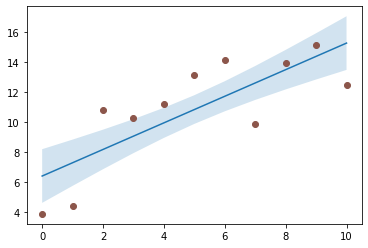

In [25]:
## Example from stackoverflow
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig,ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

## Overlaying plots

#### 6h light

In [27]:
## control and 3am light
## Waking activity

x = np.linspace(0,394,394)
y = df_output_binned_wakeAct_ctrl.mean(axis=1)
#print("len x",len(x))
#print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_wakeAct_ctrl.mean(axis=1)
y_err_ctrl = df_output_binned_wakeAct_ctrl.sem(axis=1)

y_est_3am=df_output_binned_wakeAct_3am.mean(axis=1)
y_err_3am = df_output_binned_wakeAct_3am.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.2, color='blue')

#rectangle = plt.Rectangle((22,0),59, 7, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Waking Activity Overlay")
ax.set_ylabel("Waking Activity (secs/minute)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Waking_activity_6h_overview.pdf")

TypeError: expected x and y to have same length

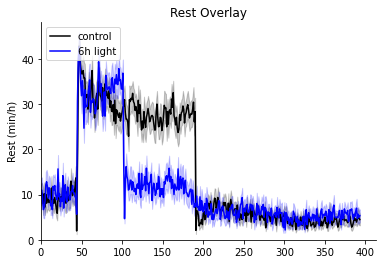

In [43]:
## control and 3am light
## Rest

x = np.linspace(0,393,394)
y = df_output_binned_rest_ctrl_NEW.mean(axis=1)
#print("len x",len(x))
#print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_output_binned_rest_ctrl_NEW.sem(axis=1)

y_est_3am=df_output_binned_rest_3am_NEW.mean(axis=1)
y_err_3am = df_output_binned_rest_3am_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.2, color='blue')

#rectangle = plt.Rectangle((22,0),59, 35, fc='grey', alpha=0.2)
#plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Rest Overlay")
ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_6h_overview.pdf")

#### Continuous Light

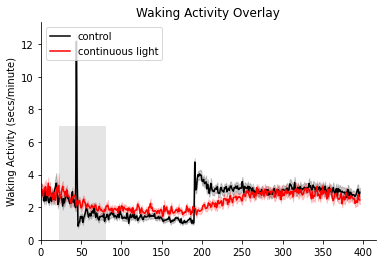

In [26]:
## control and continuous light
## Waking activity

x = np.linspace(0,396,397)
y = df_output_binned_wakeAct_ctrl.mean(axis=1)
#print("len x",len(x))
#print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_wakeAct_ctrl.mean(axis=1)
y_err_ctrl = df_output_binned_wakeAct_ctrl.sem(axis=1)

y_est_con=df_output_binned_wakeAct_con.mean(axis=1)
y_err_con = df_output_binned_wakeAct_con.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')

rectangle = plt.Rectangle((22,0),59, 7, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Waking Activity Overlay")
ax.set_ylabel("Waking Activity (secs/minute)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Waking_activity_continuous_overview.pdf")

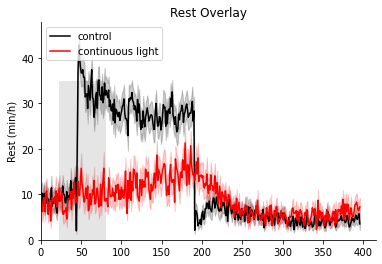

In [27]:
## control and continuous light
## Rest

x = np.linspace(0,396,397)
y = df_output_binned_rest_ctrl_NEW.mean(axis=1)
#print("len x",len(x))
#print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_output_binned_rest_ctrl_NEW.sem(axis=1)

y_est_con=df_output_binned_rest_con_NEW.mean(axis=1)
y_err_con = df_output_binned_rest_con_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')

rectangle = plt.Rectangle((22,0),59, 35, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Rest Overlay")
ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_continuous_overview.pdf")

#### Light Pulses

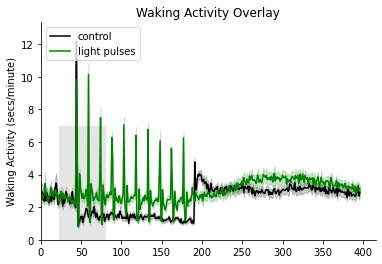

In [59]:
## control and lightpulses light
## Waking activity

x = np.linspace(0,396,397)
y = df_output_binned_wakeAct_ctrl.mean(axis=1)
#print("len x",len(x))
#print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_wakeAct_ctrl.mean(axis=1)
y_err_ctrl = df_output_binned_wakeAct_ctrl.sem(axis=1)

y_est_lp=df_output_binned_wakeAct_lp.mean(axis=1)
y_err_lp = df_output_binned_wakeAct_lp.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_lp, '-', color='green',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.2, color='green')

#rectangle = plt.Rectangle((22,0),59, 7, fc='grey', alpha=0.2)
#plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Waking Activity Overlay")
ax.set_ylabel("Waking Activity (secs/minute)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Waking_activity_lightpulses_overview.pdf")

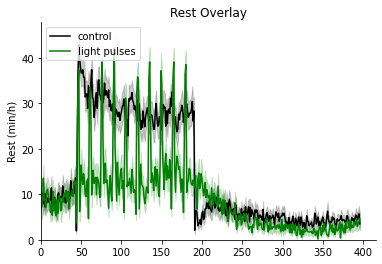

In [61]:
## control and lightpulses light
## Rest

x = np.linspace(0,396,397)
y = df_output_binned_rest_ctrl_NEW.mean(axis=1)
#print("len x",len(x))
#print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_output_binned_rest_ctrl_NEW.sem(axis=1)

y_est_lp=df_output_binned_rest_lp_NEW.mean(axis=1)
y_err_lp = df_output_binned_rest_lp_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_lp, '-', color='green',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.2, color='green')

#rectangle = plt.Rectangle((22,0),59, 35, fc='grey', alpha=0.2)
#plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Rest Overlay")
ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_lightpulses_overview.pdf")

### Overlay all in the same plot

len x 161
len y 161


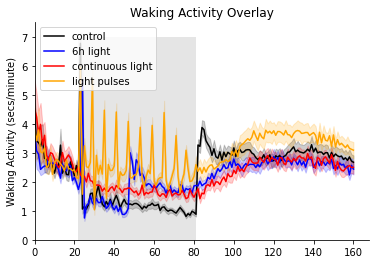

In [66]:
## Overlaying plots

x = np.linspace(0,160,161)
y = df_output_binned_wakeAct_ctrl.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_wakeAct_ctrl.mean(axis=1)
y_err_ctrl = df_output_binned_wakeAct_ctrl.sem(axis=1)

y_est_3am=df_output_binned_wakeAct_3am.mean(axis=1)
y_err_3am = df_output_binned_wakeAct_3am.sem(axis=1)

y_est_con=df_output_binned_wakeAct_con.mean(axis=1)
y_err_con = df_output_binned_wakeAct_con.sem(axis=1)

y_est_lp=df_output_binned_wakeAct_lp.mean(axis=1)
y_err_lp = df_output_binned_wakeAct_lp.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.2, color='blue')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')

ax.plot(x, y_est_lp, '-', color='orange',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.2, color='orange')

rectangle = plt.Rectangle((22,0),59, 7, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Waking Activity Overlay")
ax.set_ylabel("Waking Activity (secs/minute)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Waking_activity_overview_all.pdf")

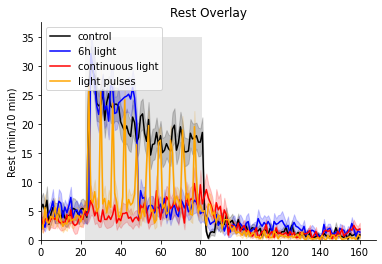

In [67]:
## Overlaying plots

x = np.linspace(0,160,161)
y = df_output_binned_wakeAct_ctrl.mean(axis=1)


# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_output_binned_rest_ctrl_NEW.sem(axis=1)

y_est_3am=df_output_binned_rest_3am_NEW.mean(axis=1)
y_err_3am = df_output_binned_rest_3am_NEW.sem(axis=1)

y_est_con=df_output_binned_rest_con_NEW.mean(axis=1)
y_err_con = df_output_binned_rest_con_NEW.sem(axis=1)

y_est_lp=df_output_binned_rest_lp_NEW.mean(axis=1)
y_err_lp = df_output_binned_rest_lp_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.2, color='blue')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')

ax.plot(x, y_est_lp, '-', color='orange',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.2, color='orange')

rectangle = plt.Rectangle((22,0),59, 35, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Rest Overlay")
ax.set_ylabel("Rest (min/10 min)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/rest_overview_all.pdf")

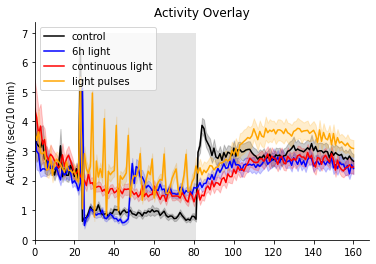

In [68]:
## Overlaying plots

x = np.linspace(0,160,161)
y = df_output_binned_act_ctrl_NEW.mean(axis=1)


# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_output_binned_act_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_output_binned_act_ctrl_NEW.sem(axis=1)

y_est_3am=df_output_binned_act_3am_NEW.mean(axis=1)
y_err_3am = df_output_binned_act_3am_NEW.sem(axis=1)

y_est_con=df_output_binned_act_con_NEW.mean(axis=1)
y_err_con = df_output_binned_act_con_NEW.sem(axis=1)

y_est_lp=df_output_binned_act_lp_NEW.mean(axis=1)
y_err_lp = df_output_binned_act_lp_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.2, color='blue')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')

ax.plot(x, y_est_lp, '-', color='orange',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.2, color='orange')

rectangle = plt.Rectangle((22,0),59, 7, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_title("Activity Overlay")
ax.set_ylabel("Activity (sec/10 min)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/activity_overview.pdf")

## Bargraphs

Bar graphs comapring different phases of the night between sleep deprived animals and their controls.

### control vs 6h light and lightpulses

In [30]:
# load data and convert into dataframe
# control data
df_rest_night1_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_ctrl_box9-20221202T181339Z-001\210121_ctrl_box9\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_ctrl)
df_rest_day1_ctrl = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_ctrl_box9-20221202T181339Z-001\210121_ctrl_box9\output_binned_rest_day1.csv", header=None)

control      0   1   2   3   4   5   6   7   8   9   ...  33  34  35  36  37  38  39  \
0     0   0   0   0   0   0   0   0   0   0  ...   0   5   0   0   0   0   0   
1     5   2   6   2   4  10   9   5   0   6  ...   1  10   0   0   1   1   5   
2    10   4   8  10   3  10   9   8   8   7  ...   6  10   1   5  10   0   6   
3    10   4  10  10   5  10   9   7   3   8  ...   7   8   1  10   5   6   8   
4    10   1  10  10   8   9   9   4   8  10  ...   4   4   4   6   4   2  10   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
141   3   2   8   9   8   2   1   7   7   1  ...   8   1   8   8   5   4   0   
142   3   5   6  10   9   4   7   1   8   0  ...   1   2   9   4  10   9   1   
143   2   0   7  10  10   8   9   6   7   4  ...   0   0   4   9   6   7   0   
144   0   0   4   9  10   3  10   3   8   3  ...   2   0   8   8   4   7   0   
145   0   2   4   8   7   1   5   9  10   0  ...   2   4   3  10   5   8   1   

     40  41  42  
0     0   0  

In [31]:
# 6h light
df_rest_night1_6h =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_3am_box2-20221202T181451Z-001\210121_lightSD_3am_box2\output_binned_rest_night1.csv", header=None)
print('6h',df_rest_night1_6h)
df_rest_day1_6h = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_3am_box2-20221202T181451Z-001\210121_lightSD_3am_box2\output_binned_rest_day1.csv", header=None)


6h      0   1   2   3   4   5   6   7   8   9   ...  26  27  28  29  30  31  32  \
0     4   2   0   0   7   0   9   3   0   0  ...   0   0   1   0   0   1   0   
1    10   6   3   2  10   5  10  10   5   0  ...   0   5  10   4   1   3   1   
2    10   8   9   3   9   1  10  10   6   2  ...   0  10   7   6   8   3   2   
3    10   8  10   2   9   2   7  10   5  10  ...   0  10   7   2  10   7   3   
4     6  10   8   1  10  10   2  10   3  10  ...   0  10  10   4   9   6   6   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
141   2   3   8   0   3   0   0   3   5   2  ...   6   1   7   1   2   0   0   
142   2   0   7   0   0   0   0   4   0   0  ...   3   3   7   2   3   3   0   
143   1   2   3   0   0   0   1   7   7   0  ...   2   0   8   1   1   1   0   
144   0   0   5   0   2   0   0   3   9   1  ...   4   3  10   2   3   0   1   
145   0   1   0   0   0   0   2   2   0   0  ...   0   0  10   3   4   0   1   

     33  34  35  
0     0   0   0  


In [32]:
# lightpulses
df_rest_night1_lp =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_pulse_box8-20221202T181715Z-001\210121_lightSD_pulse_box8\output_binned_rest_night1.csv", header=None)
print('lp',df_rest_night1_lp)
df_rest_day1_lp = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_pulse_box8-20221202T181715Z-001\210121_lightSD_pulse_box8\output_binned_rest_day1.csv", header=None)

lp      0   1   2   3   4   5   6   7   8   9   ...  21  22  23  24  25  26  27  \
0     0   0   0   0   4   0   1   0   0   3  ...   1   0   1   0   0   0   2   
1     2   6   0   2  10   5   8   1   0  10  ...   7   3  10  10   2   2  10   
2     5   7   0   5  10  10   5   2   4   9  ...  10   8  10  10   8   0   4   
3     2   6   0   3   8   6   1   2   2   6  ...   6   7   6   7   5   2   0   
4     1   0   0   0   1   0   0   0   0   0  ...   2   3   0   1   4   5   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
142   0   1   3   6   4   8   2   0   0   7  ...   6   0   0   2   4   3   0   
143   0   2   3   1   2   5   1   4   0   1  ...   5   0   0   1   6   2   0   
144   1   1   5   0   2   7   0   0   0   0  ...   7   0   0   1   9   5   0   
145   1   2   5   2   2   2   0   3   0   1  ...   6   0   0   3   7   2   0   
146   3   1   4   2   0   6   0   1   0   0  ...   1   0   0   7  10   5   0   

     28  29  30  
0     0   0   1  


In [33]:
# continuous
df_rest_night1_con =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_continuous_box7-20221202T181623Z-001\210121_lightSD_continuous_box7\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_con)
df_rest_day1_con = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\210121_Larval_SD_comparison_rawdata\210121_lightSD_continuous_box7-20221202T181623Z-001\210121_lightSD_continuous_box7\output_binned_rest_day1.csv", header=None)

control      0   1   2   3   4   5   6   7   8   9   ...  19  20  21  22  23  24  25  \
0     0   4   0   0   1   5   6   1   0   0  ...   0   3   0   5   1   2   1   
1     1   4   5   5   0   1   0   1   0   0  ...   5   1   2   3   0   0   1   
2     6   2  10   0   0  10   6   1   0   0  ...   1   0   1   4   0   9   0   
3     9   0   4   0   0   0   2   0   0   0  ...   0   1   0   1   0   9   2   
4     0   0   0   0   0   1   0   0   2   2  ...   4   0   0   1   1   9   4   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
142   4   1   2   4   1   5   0   4  10   3  ...   4   8   3   9   0   0   1   
143   3   0   0   6   0   0   0   2   4   4  ...   0   7   2   7   0   3   0   
144   2   0   2   6   0   0   0   6   3   2  ...   1   1   5   9   0   5   2   
145   0   1   2   3   0   0   1   3   4   4  ...   0   6   5   6   0   3   2   
146   2   1   0   7   0   0   0   0   0   1  ...   3   7   7  10   1   8   3   

     26  27  28  
0     7   0  

Get the column average --> mean sleep value for each fish.
Average of each column using DataFrame.mean()

In [34]:
# control
mean_df_rest_night1_ctrl = df_rest_night1_ctrl.mean(axis=0)
mean_df_rest_day1_ctrl = df_rest_day1_ctrl.mean(axis=0)

#6h light
mean_df_rest_night1_6h = df_rest_night1_6h.mean(axis=0)
mean_df_rest_day1_6h = df_rest_day1_6h.mean(axis=0)

#lightpulses
mean_df_rest_night1_lp = df_rest_night1_lp.mean(axis=0)
mean_df_rest_day1_lp = df_rest_day1_lp.mean(axis=0)

#continuous light
mean_df_rest_night1_con = df_rest_night1_con.mean(axis=0)
mean_df_rest_day1_con = df_rest_day1_con.mean(axis=0)

Change unit from min/10min to min/h for rest.
Multiply whole table by 6

In [37]:
#control
mean_df_rest_night1_ctrl_NEW = mean_df_rest_night1_ctrl.mul(6)
mean_df_rest_day1_ctrl_NEW = mean_df_rest_day1_ctrl.mul(6)

#6h light
mean_df_rest_night1_6h_NEW =mean_df_rest_night1_6h.mul(6)
mean_df_rest_day1_6h_NEW = mean_df_rest_day1_6h.mul(6)

#lightpulses
mean_df_rest_night1_lp_NEW =mean_df_rest_night1_lp.mul(6)
mean_df_rest_day1_lp_NEW = mean_df_rest_day1_lp.mul(6)

#continuous light
mean_df_rest_night1_con_NEW =mean_df_rest_night1_con.mul(6)
mean_df_rest_day1_con_NEW = mean_df_rest_day1_con.mul(6)

Plot sleep during night1

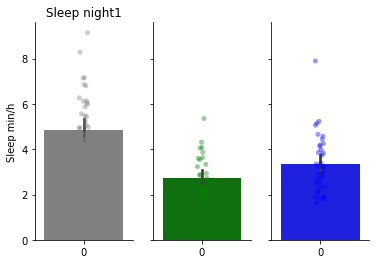

In [38]:
#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_rest_night1_ctrl, color = "grey", orient="v")
ax = sns.stripplot(ax=ax1,data=mean_df_rest_night1_ctrl, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_rest_night1_lp, color = "green", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_night1_lp, dodge=True, color="green", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax3, data=mean_df_rest_night1_6h, color = "blue", orient="v")
ax = sns.stripplot(ax=ax3,data=mean_df_rest_night1_6h, dodge=True, color="blue", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep night1")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_lp_6h_mean_night1_per10.pdf")

In [39]:
# independent t-test

#control vs lp
p = ss.ttest_ind(mean_df_rest_night1_ctrl, mean_df_rest_night1_lp, equal_var=False)
print("control vs lightpulses:", p)

# control vs 6h light
p = ss.ttest_ind(mean_df_rest_night1_ctrl, mean_df_rest_night1_6h, equal_var=False)
print("control vs 6h light:", p)

control vs lightpulses: TtestResult(statistic=7.185856024992728, pvalue=5.499824540972153e-10, df=70.58429033067452)
control vs 6h light: TtestResult(statistic=4.613282975335234, pvalue=1.5525590900452956e-05, df=76.99948684032425)


Plot sleep during day1

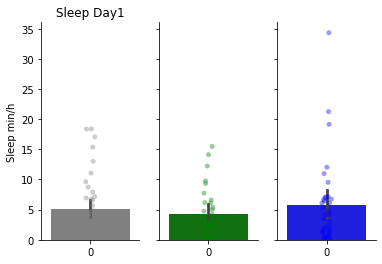

In [41]:
# plot sleep during day1

a4_dims = (11.7, 8.27)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax = sns.barplot(ax=ax1,data=mean_df_rest_day1_ctrl_NEW, color = "grey", orient="v")
ax = sns.stripplot(ax=ax1,data=mean_df_rest_day1_ctrl_NEW,  color="grey", alpha = 0.4, jitter = 0.05)

ax = sns.barplot(ax=ax2,data=mean_df_rest_day1_lp_NEW, color = "green", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_day1_lp_NEW, color="green", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax3,data=mean_df_rest_day1_6h_NEW, color = "blue", orient="v")
ax = sns.stripplot(ax=ax3,data=mean_df_rest_day1_6h_NEW, color="blue", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep Day1")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_lp_6h_mean_day1_per10.pdf")

In [42]:
# independent t-test

#control vs lp
p = ss.ttest_ind(mean_df_rest_day1_ctrl_NEW, mean_df_rest_day1_lp_NEW, equal_var=False)
print("control vs lightpulses:", p)

# control vs 6h light
p = ss.ttest_ind(mean_df_rest_day1_ctrl_NEW, mean_df_rest_day1_6h_NEW, equal_var=False)
print("control vs 6h light:", p)

control vs lightpulses: TtestResult(statistic=0.7086731835953854, pvalue=0.4808657498183748, df=70.45118436548489)
control vs 6h light: TtestResult(statistic=-0.4523995817733837, pvalue=0.6525498865142862, df=62.4060873827109)


### Continous light

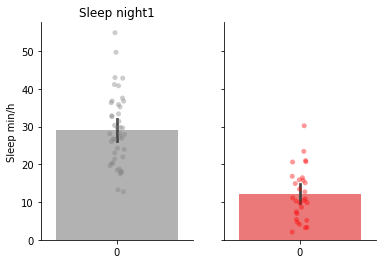

In [43]:
# plot sleep during night1

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, color = "grey", orient="v", alpha=0.6)
ax = sns.stripplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_rest_night1_con_NEW, color = "red", orient="v",alpha=0.6)
ax = sns.stripplot(ax=ax2,data=mean_df_rest_night1_con_NEW, dodge=True, color="red", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep night1")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_continuous_mean_night1.pdf")

In [44]:
# independent t-test
#control vs continuous
p = ss.ttest_ind(mean_df_rest_night1_ctrl_NEW, mean_df_rest_night1_con_NEW, equal_var=False)
print("control vs continuous:", p)

control vs continuous: TtestResult(statistic=8.850384877962808, pvalue=5.259572117792201e-13, df=69.51802619195293)


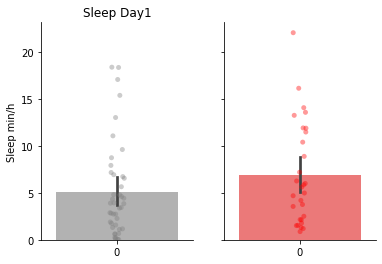

In [45]:
# plot sleep during day1

a4_dims = (11.7, 8.27)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax = sns.barplot(ax=ax1,data=mean_df_rest_day1_ctrl_NEW, color = "grey", orient="v",alpha=0.6)
ax = sns.stripplot(ax=ax1,data=mean_df_rest_day1_ctrl_NEW,  color="grey", alpha = 0.4, jitter = 0.05)

ax = sns.barplot(ax=ax2,data=mean_df_rest_day1_con_NEW, color = "red", orient="v",alpha=0.6)
ax = sns.stripplot(ax=ax2,data=mean_df_rest_day1_con_NEW, color="red", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep Day1")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/210121_Larval_SD_comparison_rawdata/Plots_Activity&Rest/Rest_con_mean_day1.pdf")

In [46]:
# independent t-test
#control vs continuous
p = ss.ttest_ind(mean_df_rest_day1_ctrl_NEW, mean_df_rest_day1_con_NEW, equal_var=False)
print("control vs continuous:", p)

control vs continuous: TtestResult(statistic=-1.4474465723028176, pvalue=0.15326035449727815, df=56.88971890053199)


# REBOUND DATA

Now we plot the rebound data. Fish have been sleep deprived, were subjected to 3 hours of light in the morning and then lights were switched off again.

### 6h light

In [88]:
### Control
df_act_ctrl =pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_act_ctrl.csv", header=None)
print(df_act_ctrl)

df_rest_ctrl = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_rest_ctrl.csv",header=None)
#print(df_rest_ctrl)


df_wakeAct_ctrl = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_wakeAct_ctrl)

       0     1     2     3    4     5     6     7    8     9   ...   38    39  \
0     0.4   0.0   0.0  14.1  0.0   1.4   0.6   1.1  2.4   0.0  ...  0.6   0.0   
1     0.0   0.6   6.8   7.0  0.0   1.8   1.3   0.0  0.5   0.8  ...  0.0   0.6   
2     0.0   0.0   0.0   0.0  0.0   5.5   1.7   0.0  2.6   1.3  ...  0.7  18.4   
3     0.0   0.0   0.0   0.0  0.0   0.0   2.6   0.0  1.0   0.0  ...  1.7  14.6   
4     0.0   0.0   0.0   0.0  0.0   7.8  16.7   0.0  0.4   0.6  ...  2.1   2.9   
..    ...   ...   ...   ...  ...   ...   ...   ...  ...   ...  ...  ...   ...   
340   6.0   9.9   1.1   6.3  8.9  15.0  11.0  16.6  0.0   5.7  ...  0.7   6.8   
341   9.6   7.2   0.7   5.0  1.2  11.3   5.0  14.2  0.6  13.0  ...  0.0  10.6   
342  10.5   8.3  24.5   4.8  0.4  15.3  20.0  10.3  0.0   0.8  ...  1.2  10.6   
343   3.5   8.2   6.5   8.2  0.6  14.4   7.9   7.8  0.0   6.0  ...  0.7   4.0   
344   5.5  11.6   8.5   5.3  3.9  13.9   4.2   5.2  6.3  16.0  ...  0.0   9.5   

       40    41    42   43 

In [89]:
### 3am
df_act_3am =pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210422_LightSD_3am_box10-20221226T144029Z-001\210422_LightSD_3am_box10\output_binned_act_ctrl.csv", header=None)
#print(df_act_3am)

df_rest_3am = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210422_LightSD_3am_box10-20221226T144029Z-001\210422_LightSD_3am_box10\output_binned_rest_ctrl.csv",header=None)
print(df_rest_3am)


df_wakeAct_3am = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210422_LightSD_3am_box10-20221226T144029Z-001\210422_LightSD_3am_box10\output_binned_wakeAct_ctrl.csv",header=None)
#print(df_wakeAct_3am)

     0   1   2   3   4   5   6   7   8   9   ...  38  39  40  41  42  43  44  \
0     1  10  10  10  10   7   4  10   9  10  ...   7   8  10   4  10   7  10   
1     5   9  10  10  10   4   9  10   7  10  ...   3  10  10  10   7   7   9   
2     5  10   7   7   5   5  10  10   8  10  ...   1   9  10   8   4   3   6   
3     3   8   5   8   2   1  10  10   9   9  ...   4   3  10   7  10   2   4   
4     6  10   4  10   5   1  10  10   4  10  ...   4   0  10   3  10   9   6   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
340  10   0  10   2  10  10   6   6   9   8  ...  10   7   2  10   0   1   4   
341   0   0   9   5  10   1   4   2  10  10  ...  10   2   6  10   1   2   8   
342   2   0   7   7   9   6   5   4   4   9  ...   9   3  10  10   5  10   6   
343   1   1   1  10   8   7   6   5   6   6  ...   6   5   8  10   8  10   0   
344   1   0   1   7   4  10   7   3   1   9  ...   8   9   6  10   3   8   6   

     45  46  47  
0     9   5   6  
1  

##### Cut all df to same length (144 rows)

In [22]:
"""
# control
stop = len(df_act_ctrl)
df_act_ctrl = df_act_ctrl.drop(labels=range(344,stop), axis =0)
#print(df_act_ctrl)

#stop = len(df_output_binned_rest_ctrl)
df_rest_ctrl = df_rest_ctrl.drop(labels=range(344,stop), axis = 0)
print(df_rest_ctrl)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_ctrl = df_wakeAct_ctrl.drop(labels=range(344,stop), axis=0)
#print(df_wakeAct_ctrl)
"""

     0   1   2   3   4   5   6   7   8   9   ...  38  39  40  41  42  43  44  \
0     9  10  10   5  10   8   9   8   8  10  ...   9  10   8   3   8  10   9   
1    10   9   7   3  10   6   9  10   9   8  ...  10   9  10   7   7  10   8   
2    10  10  10  10  10   6   6  10   6   8  ...   9   2  10   4   8   6   9   
3    10  10  10  10  10  10   4  10   8  10  ...   7   1  10   4   9  10  10   
4    10  10  10  10  10   7   2  10   9   9  ...   7   6   9   0  10   9  10   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
339   6   1   9   5   9   0   7   4  10   2  ...   8   3   4   8   5   7   1   
340   4   0   8   4   6   2   3   1  10   5  ...   9   5   5   7   8   9   3   
341   2   0   8   5   8   2   7   4   9   3  ...  10   0   3   4   7   8   3   
342   1   2   1   6   9   1   1   2  10   9  ...   8   3   9   0   6   6   9   
343   4   0   3   3   9   1   7   5  10   6  ...   9   6   6   3   6   8   5   

     45  46  47  
0    10  10  10  
1  

In [5]:
"""
# 3am
stop = len(df_act_3am)
df_act_3am = df_act_3am.drop(labels=range(344,stop), axis =0)
#print(df_act_3am)

#stop = len(df_output_binned_rest_ctrl)
df_rest_3am = df_rest_3am.drop(labels=range(285,stop), axis = 0)
print(df_rest_3am)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_3am = df_wakeAct_3am.drop(labels=range(285,stop), axis=0)
#print(df_wakeAct_3am)
"""

     0   1   2   3   4   5   6   7   8   9   ...  38  39  40  41  42  43  44  \
0     1  10  10  10  10   7   4  10   9  10  ...   7   8  10   4  10   7  10   
1     5   9  10  10  10   4   9  10   7  10  ...   3  10  10  10   7   7   9   
2     5  10   7   7   5   5  10  10   8  10  ...   1   9  10   8   4   3   6   
3     3   8   5   8   2   1  10  10   9   9  ...   4   3  10   7  10   2   4   
4     6  10   4  10   5   1  10  10   4  10  ...   4   0  10   3  10   9   6   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
280   5   1   1   4   3   0   3   9   6   3  ...   2   5   7   3   1   3   1   
281   1   1   4   5   9   7   3   7   4   1  ...   3   9   3   1   1   4   5   
282   4   0   2   4   9   7   6   4   4   3  ...   3   5   7   3   3   5   5   
283   1   4   0   3   7   0   3   3   8   3  ...   2   5   3   6   1   2   6   
284   0   1   3   5   3   2   2   6   8   4  ...   1   4   8   1   0   5   4   

     45  46  47  
0     9   5   6  
1  

##### Unit Conversion

In [90]:
# Rest
## change unit from min/10min to min/h for rest
## multiply whole table by 6

df_rest_ctrl_NEW = df_rest_ctrl.mul(6)
print(df_rest_ctrl_NEW)

df_rest_3am_NEW = df_rest_3am.mul(6)


     0   1   2   3   4   5   6   7   8   9   ...  38  39  40  41  42  43  44  \
0    54  60  60  30  60  48  54  48  48  60  ...  54  60  48  18  48  60  54   
1    60  54  42  18  60  36  54  60  54  48  ...  60  54  60  42  42  60  48   
2    60  60  60  60  60  36  36  60  36  48  ...  54  12  60  24  48  36  54   
3    60  60  60  60  60  60  24  60  48  60  ...  42   6  60  24  54  60  60   
4    60  60  60  60  60  42  12  60  54  54  ...  42  36  54   0  60  54  60   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
340  24   0  48  24  36  12  18   6  60  30  ...  54  30  30  42  48  54  18   
341  12   0  48  30  48  12  42  24  54  18  ...  60   0  18  24  42  48  18   
342   6  12   6  36  54   6   6  12  60  54  ...  48  18  54   0  36  36  54   
343  24   0  18  18  54   6  42  30  60  36  ...  54  36  36  18  36  48  30   
344  12   0  12  36  42   6  30  30  30  18  ...  60  18  48  54  24  60   6   

     45  46  47  
0    60  60  60  
1  

In [91]:
## Binned Activity
## change unit from sec/10min to min/h
## divide whole table by 10

df_act_ctrl_NEW = df_act_ctrl.div(10)
#print(df_act_ctrl_NEW)

df_act_3am_NEW = df_act_3am.div(10)


##### Plots

In [92]:
## control and 3am light, rebound data
## Waking activity

x = np.linspace(0,344,345)
y = df_wakeAct_ctrl.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_wakeAct_ctrl.mean(axis=1)
#print(len(y_est_ctrl))
y_err_ctrl = df_wakeAct_ctrl.sem(axis=1)
#print(len(y_err_ctrl))

y_est_3am=df_wakeAct_3am.mean(axis=1)
y_err_3am = df_wakeAct_3am.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.4, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.4, color='blue')


#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((0,0),141, 18, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((183,0),164, 18, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

ax.set_title("Waking Activity Rebound")
ax.set_ylabel("Waking Activity (secs/minute)")
ax.set_ylim(0,18)
ax.set_xlim(0,)
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Waking_activity_6h_rebound.pdf")



len x 345
len y 345


'\n# because control and 3am do not have same length: cut control by last row\ny_est_ctrl = y_est_ctrl.drop(144, axis = 0)\ny_est_ctrl = y_est_ctrl.drop([0,1,2], axis =0) # drop to align with 3am\nprint(y_est_ctrl)\ny_err_ctrl = y_err_ctrl.drop(144, axis =0)\ny_err_ctrl = y_err_ctrl.drop([0,1,2], axis =0) # drop to align with 3am\n\ny_est_3am=df_wakeAct_3am.mean(axis=1)\ny_est_3am = y_est_3am.drop([141,142,143], axis=0) # drop to align with control\n#print(len(y_est_3am))\ny_err_3am = df_wakeAct_3am.sem(axis=1)\ny_err_3am = y_err_3am.drop([141,142,143], axis =0) # drop to align with control\n#print(len(y_err_3am))\n\n# adjust x according to what you dropped from y\n#x = np.linspace(0,140,141)\n\n\n\nfig, ax = plt.subplots()\nax.plot(x, y_est_ctrl, \'-\', color=\'black\',label="control")\nax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color=\'black\')\n#ax.plot(x, y, \'o\', color=\'tab:red\')\n\nax.plot(x, y_est_3am, \'-\', color=\'blue\',label="6h light

len x 345
len y 345


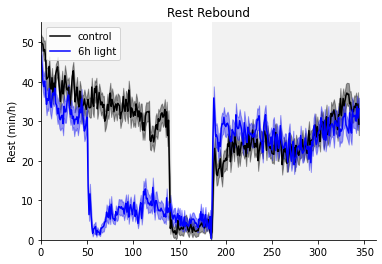

In [94]:
## control and 3am light
## Rest

x = np.linspace(0,344,345)
y = df_rest_3am_NEW.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_rest_ctrl_NEW.sem(axis=1)


y_est_3am=df_rest_3am_NEW.mean(axis=1)
y_err_3am = df_rest_3am_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.4, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_3am, '-', color='blue',label="6h light")
ax.fill_between(x, y_est_3am - y_err_3am, y_est_3am + y_err_3am, alpha=0.4, color='blue')

#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((0,0),142, 55, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((185,0),160, 55, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

ax.set_title("Rest Rebound")
ax.set_ylabel("Rest (min/h)")
ax.set_ylim(0,55)
ax.set_xlim(0,)
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_6h_rebound.pdf")

## Light pulses and sound pulses

In [64]:
### Control
df_act_ctrl =pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_act_ctrl.csv", header=None)
#print(df_act_ctrl)

df_rest_ctrl = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_rest_ctrl.csv",header=None)
#print(df_rest_ctrl)


df_wakeAct_ctrl = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_wakeAct_ctrl.csv",header=None)
print(df_wakeAct_ctrl)

          0        1       2        3       4       5        6        7   \
0    0.50000  0.00000  0.0000  3.12500  1.4167  2.8500  0.22857  2.15000   
1    0.84000  1.86250  1.9625  3.26250  2.9778  2.8556  1.38750  3.20000   
2    0.60000  1.13330  1.4600  0.60000  1.7250  1.2000  0.65000  0.68571   
3    0.30000  0.68571  1.7500  3.55710  1.4778  1.7333  0.68889  0.80000   
4    0.44000  0.54444  1.3000  1.70000  1.0700  2.0800  1.12000  0.00000   
..       ...      ...     ...      ...     ...     ...      ...      ...   
340  0.97500  4.70000  0.0000  1.64000  0.7000  0.0000  1.83330  1.15000   
341  1.00000  1.38000  2.9000  1.02860  0.0000  0.0000  1.52000  0.00000   
342  1.60000  0.50000  0.0000  0.95556  3.3000  2.4500  1.55000  0.65000   
343  0.86667  0.76667  0.0000  1.20000  2.0333  1.9111  1.73330  0.00000   
344  0.70000  1.90000  0.0000  2.20000  0.9000  1.6556  1.63330  0.00000   

          8        9   ...      48       49       50   51      52       53  \
0    0.97

In [65]:
### lightpulses
df_act_lp =pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_LightSD_pulse_spontaneous_box8-20221226T144044Z-002\210504_LightSD_pulse_spontaneous_box8\output_binned_act_ctrl.csv", header=None)
#print(df_act_lp)

df_rest_lp = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_LightSD_pulse_spontaneous_box8-20221226T144044Z-002\210504_LightSD_pulse_spontaneous_box8\output_binned_rest_ctrl.csv",header=None)
#print(df_rest_lp)


df_wakeAct_lp = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_LightSD_pulse_spontaneous_box8-20221226T144044Z-002\210504_LightSD_pulse_spontaneous_box8\output_binned_wakeAct_ctrl.csv",header=None)
print(df_wakeAct_lp)

        0      1        2       3       4        5        6        7   \
0    1.940  0.925  0.74000  2.5778  0.4500  2.20000  0.10000  0.10000   
1    0.000  1.300  0.45000  1.6700  0.4000  0.66250  0.13333  0.55000   
2    0.000  0.500  0.96667  3.2125  2.5167  0.88750  0.10000  2.25000   
3    0.000  0.600  0.50000  3.7200  1.9556  0.91429  0.66667  0.20000   
4    0.100  0.600  0.65000  2.1333  1.4889  2.27780  1.64000  0.17143   
..     ...    ...      ...     ...     ...      ...      ...      ...   
340  0.650  1.500  3.13330  0.0000  1.4000  1.13000  1.40000  1.82500   
341  0.525  0.560  0.90000  0.1000  2.0429  1.13000  0.92500  0.00000   
342  0.500  0.550  0.70000  0.1000  1.1333  1.33000  1.06670  0.80000   
343  0.700  1.100  0.90000  0.0000  1.3000  1.02500  0.50000  0.60000   
344  0.900  1.100  0.70000  0.6000  1.0000  1.12220  0.20000  0.00000   

          8       9   ...       49       50       51    52       53       54  \
0    0.62857  2.2900  ...  2.87500  3.88000

In [73]:
### sound
df_act_sound =pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_SoundSD_stimulus_box10-20221226T144050Z-001\210504_SoundSD_stimulus_box10\output_binned_act_ctrl.csv", header=None)
#print(df_wakeAct_sound)

df_rest_sound = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_SoundSD_stimulus_box10-20221226T144050Z-001\210504_SoundSD_stimulus_box10\output_binned_rest_ctrl.csv",header=None)
#print(df_wakeAct_sound)


df_wakeAct_sound = pd.read_csv(r"C:\Users\paula\Documents\MATLAB\Engert_lab\Will_rebound_data\210504_SoundSD_stimulus_box10-20221226T144050Z-001\210504_SoundSD_stimulus_box10\output_binned_wakeAct_ctrl.csv",header=None)
print(df_wakeAct_sound)

        0      1       2      3         4        5       6       7        8   \
0    1.172  3.248  2.4280  3.420  13.46000  9.86800  0.8680  1.6400  0.66500   
1    1.252  2.468  1.9480  1.612   0.85714  8.02400  1.6800  1.1040  0.31333   
2    1.176  2.836  2.7733  2.672   3.61600  7.81600  2.6160  2.9333  0.82667   
3    1.372  8.600  8.6933  5.412   4.65600  3.30800  7.2680  4.4120  5.47000   
4    0.544  0.936  0.1400  1.180   1.02400  0.29333  0.5120  1.2560  0.59200   
..     ...    ...     ...    ...       ...      ...     ...     ...      ...   
139  0.260  0.660  0.1600  0.660   0.00000  0.00000  1.3500  0.6800  0.24000   
140  0.000  0.376  0.0000  1.640   0.24000  0.36000  1.1829  0.4200  0.24000   
141  0.200  0.560  1.5733  0.280   0.00000  0.24000  1.1829  0.3800  1.47600   
142  1.000  0.000  0.2800  0.000   0.85000  0.56000  1.1400  1.0800  1.54400   
143  0.560  0.360  0.1200  0.360   1.01710  0.28000  1.3400  0.0000  1.02400   

        9   ...       47        48     

##### Cut df to same length

In [14]:
"""
# control
stop = len(df_act_ctrl)
df_act_ctrl = df_act_ctrl.drop(labels=range(145,stop), axis =0)
#print(df_output_binned_act_ctrl)

#stop = len(df_output_binned_rest_ctrl)
df_rest_ctrl = df_rest_ctrl.drop(labels=range(145,stop), axis = 0)
#print(df_output_binned_rest_ctrl)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_ctrl = df_wakeAct_ctrl.drop(labels=range(145,stop), axis=0)
print(df_wakeAct_ctrl)
"""

          0        1       2       3       4       5        6        7   \
0     0.5000  0.00000  0.0000  3.1250  1.4167  2.8500  0.22857  2.15000   
1     0.8400  1.86250  1.9625  3.2625  2.9778  2.8556  1.38750  3.20000   
2     0.6000  1.13330  1.4600  0.6000  1.7250  1.2000  0.65000  0.68571   
3     0.3000  0.68571  1.7500  3.5571  1.4778  1.7333  0.68889  0.80000   
4     0.4400  0.54444  1.3000  1.7000  1.0700  2.0800  1.12000  0.00000   
..       ...      ...     ...     ...     ...     ...      ...      ...   
140   2.0571  5.76000  2.8250  3.1900  5.2200  2.6200  2.51000  3.59000   
141   5.6900  4.47000  1.3000  2.2500  4.0600  1.9500  3.21000  0.58333   
142   8.8800  6.23000  4.3571  5.8143  3.1667  1.9714  5.61000  1.68000   
143   9.8100  5.36000  2.6000  1.9600  5.4400  3.0333  8.65000  2.41430   
144  11.5200  7.48000  1.9333  3.0222  4.4100  1.5700  8.17000  5.00000   

           8        9   ...      48       49        50      51       52  \
0     0.97143  0.78889  

In [15]:
"""
# lightpulses
stop = len(df_act_lp)
df_act_lp = df_act_lp.drop(labels=range(145,stop), axis =0)
#print(df_output_binned_act_ctrl)

#stop = len(df_output_binned_rest_ctrl)
df_rest_lp = df_rest_lp.drop(labels=range(145,stop), axis = 0)
#print(df_output_binned_rest_ctrl)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_lp = df_wakeAct_lp.drop(labels=range(145,stop), axis=0)
print(df_wakeAct_lp)
"""

          0        1        2       3       4        5        6        7   \
0    1.94000  0.92500  0.74000  2.5778  0.4500  2.20000  0.10000  0.10000   
1    0.00000  1.30000  0.45000  1.6700  0.4000  0.66250  0.13333  0.55000   
2    0.00000  0.50000  0.96667  3.2125  2.5167  0.88750  0.10000  2.25000   
3    0.00000  0.60000  0.50000  3.7200  1.9556  0.91429  0.66667  0.20000   
4    0.10000  0.60000  0.65000  2.1333  1.4889  2.27780  1.64000  0.17143   
..       ...      ...      ...     ...     ...      ...      ...      ...   
140  0.60000  1.35000  1.73000  3.8778  1.2222  1.24440  0.28000  1.80000   
141  0.22000  0.35000  1.73000  0.8250  1.6857  1.52000  1.46670  2.46000   
142  0.50000  1.36670  2.13000  1.0000  1.8000  3.00000  0.92000  2.18890   
143  0.33333  0.73333  2.42000  0.7400  1.5125  2.96670  0.62000  1.91430   
144  0.58000  0.77143  1.67780  4.9000  1.6833  1.71110  0.00000  0.52000   

          8       9   ...       49      50       51       52       53  \
0 

In [16]:
"""
# sound
stop = len(df_act_ctrl)
df_act_sound = df_act_sound.drop(labels=range(145,stop), axis =0)
#print(df_output_binned_act_ctrl)

#stop = len(df_output_binned_rest_ctrl)
df_rest_sound = df_rest_sound.drop(labels=range(145,stop), axis = 0)
#print(df_output_binned_rest_ctrl)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_sound = df_wakeAct_sound.drop(labels=range(145,stop), axis=0)
print(df_wakeAct_sound)
"""

        0      1       2      3         4        5       6       7        8   \
0    1.172  3.248  2.4280  3.420  13.46000  9.86800  0.8680  1.6400  0.66500   
1    1.252  2.468  1.9480  1.612   0.85714  8.02400  1.6800  1.1040  0.31333   
2    1.176  2.836  2.7733  2.672   3.61600  7.81600  2.6160  2.9333  0.82667   
3    1.372  8.600  8.6933  5.412   4.65600  3.30800  7.2680  4.4120  5.47000   
4    0.544  0.936  0.1400  1.180   1.02400  0.29333  0.5120  1.2560  0.59200   
..     ...    ...     ...    ...       ...      ...     ...     ...      ...   
139  0.260  0.660  0.1600  0.660   0.00000  0.00000  1.3500  0.6800  0.24000   
140  0.000  0.376  0.0000  1.640   0.24000  0.36000  1.1829  0.4200  0.24000   
141  0.200  0.560  1.5733  0.280   0.00000  0.24000  1.1829  0.3800  1.47600   
142  1.000  0.000  0.2800  0.000   0.85000  0.56000  1.1400  1.0800  1.54400   
143  0.560  0.360  0.1200  0.360   1.01710  0.28000  1.3400  0.0000  1.02400   

        9   ...       47        48     

##### Unit conversion

In [67]:
# Rest
## change unit from min/10min to min/h for rest
## multiply whole table by 6

df_rest_ctrl_NEW = df_rest_ctrl.mul(6)
print(df_rest_ctrl_NEW)

df_rest_lp_NEW = df_rest_lp.mul(6)

df_rest_sound_NEW = df_rest_sound.mul(6)


     0   1   2   3   4   5   6   7   8   9   ...  48  49  50  51  52  53  54  \
0    54  60  60  12  24  48  18  48  18   6  ...  30   6  54  60  48  54  54   
1    30  12  12  12   6   6  12  24  18   0  ...  54  18  42  54  30  48  24   
2    54   6  30  54  12  48  24  18  48   0  ...  54   6  36  60  24  54  30   
3    48  18  12  18   6   6   6  54  48   6  ...  54   6  30  60   6  54  24   
4    30   6  18  36   0   0   0  60  36   0  ...  54   6  18  60  24  60  18   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
340  36  54  60   0  48  60   6  48  60  36  ...  60  60  48  60  30  42  12   
341  54  30  54  18  60  60   0  60  54  42  ...  54  36  36  60  36  42  12   
342  42  48  60   6  42  36   0  48  54  54  ...  60  18  48  60  48  48  18   
343  42  42  60  12  42   6   6  60  60  54  ...  60  24  54  60  54  54   0   
344  48  30  60  18  54   6   6  60  60  60  ...  42  18  48  54  60  48  12   

     55  56  57  
0    60  54  60  
1  

In [68]:
## Binned Activity
## change unit from sec/10min to min/h
## divide whole table by 10

df_act_ctrl_NEW = df_act_ctrl.div(10)
#print(df_act_ctrl_NEW)

df_act_3am_NEW = df_act_3am.div(10)

df_act_sound_NEW = df_act_sound.div(10)


##### Plots

len x 345
len y 345


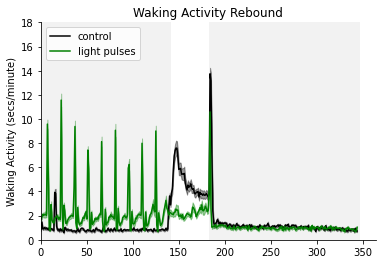

In [69]:
## control lightplses, rebound data
## Waking activity

x = np.linspace(0,344,345)
y = df_wakeAct_lp.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)

y_est_ctrl = df_wakeAct_ctrl.mean(axis=1)
#print(len(y_est_ctrl))
y_err_ctrl = df_wakeAct_ctrl.sem(axis=1)
#print(len(y_err_ctrl))


y_est_lp=df_wakeAct_lp.mean(axis=1)
#print(len(y_est_3am))
y_err_lp = df_wakeAct_lp.sem(axis=1)
#print(len(y_err_3am))



fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.4, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_lp, '-', color='green',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.4, color='green')


#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((0,0),141, 18, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((183,0),164, 18, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

ax.set_title("Waking Activity Rebound")
ax.set_ylabel("Waking Activity (secs/minute)")
ax.set_ylim(0,18)
ax.set_xlim(0,)
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Waking_activity_lightpulses_rebound.pdf")

len x 345
len y 345


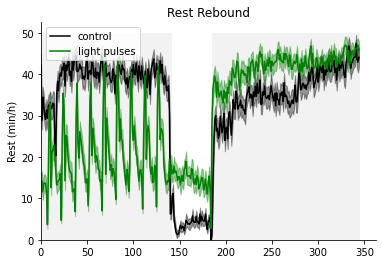

In [70]:
## control and lightpulses
## Rest

x = np.linspace(0,344,345)
y = df_rest_lp_NEW.mean(axis=1)
print("len x",len(x))
print("len y",len(y))


# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_rest_ctrl_NEW.sem(axis=1)


y_est_lp=df_rest_lp_NEW.mean(axis=1)
y_err_lp = df_rest_lp_NEW.sem(axis=1)



fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.4, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_lp, '-', color='green',label="light pulses")
ax.fill_between(x, y_est_lp - y_err_lp, y_est_lp + y_err_lp, alpha=0.4, color='green')

#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((0,0),142, 50, fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((185,0),160,50 , fc='grey', alpha=0.1)
plt.gca().add_patch(rectangle)

ax.set_title("Rest Rebound")
ax.set_ylabel("Rest (min/h)")
ax.set_ylim(0,)
ax.set_xlim(0,)
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/rest_lightpulses_rebound.pdf")

len x 144
len y 144


ValueError: x and y must have same first dimension, but have shapes (144,) and (345,)

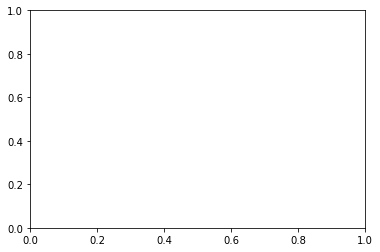

In [75]:
## control vs sound, rebound data
## Waking activity

x = np.linspace(0,143,144)
y = df_wakeAct_sound.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_wakeAct_ctrl.mean(axis=1)
#print(len(y_est_ctrl))
y_err_ctrl = df_wakeAct_ctrl.sem(axis=1)
#print(len(y_err_ctrl))


y_est_sound=df_wakeAct_sound.mean(axis=1)
#print(len(y_est_3am))
y_err_sound = df_wakeAct_sound.sem(axis=1)
#print(len(y_err_3am))


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_sound, '-', color='purple',label="acoustic")
ax.fill_between(x, y_est_sound - y_err_sound, y_est_sound + y_err_sound, alpha=0.2, color='purple')


#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((1.5,0),62, 14, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((79,0),65, 14, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_title("Waking Activity Rebound")
ax.set_ylabel("Waking Activity (secs/minute)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Waking_activity_sound_rebound.pdf")


len x 144
len y 144


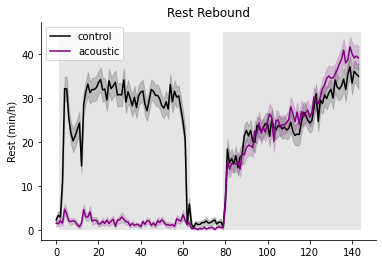

In [32]:
## control and lightpulses
## Rest

x = np.linspace(0,143,144)
y = df_rest_sound_NEW.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_rest_ctrl_NEW.sem(axis=1)

y_est_sound=df_rest_sound_NEW.mean(axis=1)
y_err_sound = df_rest_sound_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_sound, '-', color='purple',label="acoustic")
ax.fill_between(x, y_est_sound - y_err_sound, y_est_sound + y_err_sound, alpha=0.2, color='purple')

#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((1.5,0),62, 45, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((79,0),65, 45, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)
ax.set_title("Rest Rebound")
ax.set_ylabel("Rest (min/h)")
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_sound_rebound.pdf")

## Continuous light

In [79]:
### control
df_act_ctrl =pd.read_csv(r"I:\sleep_rebound\2023_04_24_paula_96well_plate_control_rebound\output_binned_act_ctrl.csv", header=None)
#print(df_act_ctrl)

df_rest_ctrl = pd.read_csv(r"I:\sleep_rebound\2023_04_24_paula_96well_plate_control_rebound\output_binned_rest_ctrl.csv",header=None)
#print(df_rest_ctrl)


df_wakeAct_ctrl = pd.read_csv(r"I:\sleep_rebound\2023_04_24_paula_96well_plate_control_rebound\output_binned_wakeAct_ctrl.csv",header=None)
print(df_wakeAct_ctrl)

          0        1        2        3        4        5        6        7   \
0    0.14286  2.07140  0.00000  0.14286  0.65714  0.69388  0.60714  0.92857   
1    0.71429  0.28571  0.00000  0.00000  0.28571  0.85714  0.45714  0.71429   
2    0.00000  1.45710  0.00000  0.14286  1.52860  1.76190  0.69048  2.00000   
3    0.90476  0.60714  0.00000  0.00000  1.94290  1.85710  1.42860  1.50790   
4    0.00000  2.47620  0.00000  0.00000  1.94290  0.65714  0.45714  2.41070   
..       ...      ...      ...      ...      ...      ...      ...      ...   
327  0.83333  1.02040  0.00000  0.14286  1.08160  1.38100  0.88571  1.59520   
328  1.19640  0.64286  0.00000  0.00000  1.39680  1.57140  1.17860  1.42860   
329  0.74603  1.06350  0.00000  0.00000  1.07940  1.05360  1.08570  1.11430   
330  0.71429  1.50000  0.14286  0.14286  0.85714  1.21430  1.14290  1.55560   
331  0.64286  0.82857  0.00000  0.00000  1.07140  0.00000  1.60320  1.37140   

          8        9   ...       37       38       

In [80]:
### continuous light
df_act_con =pd.read_csv(r"I:\sleep_rebound\2023_05_01_paula_rebound_continuous_box8\output_binned_act_ctrl.csv", header=None)
#print(df_act_con)

df_rest_con = pd.read_csv(r"I:\sleep_rebound\2023_05_01_paula_rebound_continuous_box8\output_binned_rest_ctrl.csv",header=None)
#print(df_rest_con)


df_wakeAct_con = pd.read_csv(r"I:\sleep_rebound\2023_05_01_paula_rebound_continuous_box8\output_binned_wakeAct_ctrl.csv",header=None)
print(df_wakeAct_con)

          0       1        2       3       4        5        6        7   \
0    2.00000  3.0159  1.80950  1.3810  7.2286  7.31430  2.68570  0.95238   
1    1.36730  1.9821  0.91837  1.2381  4.4571  9.67140  1.63270  2.14290   
2    0.28571  2.7429  3.25400  4.7857  2.8714  8.11430  0.28571  2.63490   
3    0.28571  2.7460  3.52860  3.8095  3.8714  6.91430  1.85710  1.07140   
4    0.90476  2.1607  3.11430  2.3750  4.6857  4.38570  2.00000  1.85710   
..       ...     ...      ...     ...     ...      ...      ...      ...   
337  1.40480  2.1667  1.93650  3.0571  2.1020  0.00000  1.85710  1.32140   
338  1.52380  2.0000  3.39290  2.8429  2.3061  3.00000  2.00000  0.95238   
339  1.30360  2.5238  1.85710  3.0476  1.8429  1.57140  1.69390  0.71429   
340  0.93878  2.3333  1.21430  1.8929  3.2286  0.71429  1.50000  3.35710   
341  0.95714  3.0635  1.89290  1.6857  1.9821  0.71429  1.35710  2.95240   

          8        9   ...      63       64       65       66       67  \
0    0.38095 

##### clipping

In [73]:
# clip all to same length
#control
stop = len(df_act_ctrl)
df_act_ctrl = df_act_ctrl.drop(labels=range(342,stop), axis =0)
#print(df_act_3am)

#stop = len(df_output_binned_rest_ctrl)
df_rest_ctrl = df_rest_ctrl.drop(labels=range(342,stop), axis = 0)
print(df_rest_ctrl)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_ctrl = df_wakeAct_ctrl.drop(labels=range(342,stop), axis=0)
#print(df_wakeAct_3am)


     0   1   2   3   4   5   6   7   8   9   ...  67  68  69  70  71  72  73  \
0     2   9   8   1   3   2   1   5   8   1  ...   3   8   3   5   1   1   0   
1     4   9   6   4   3   2   2   2   6   1  ...   2   4   6   0   8   0   6   
2     0   8   8   4   5   3   2   4  10   8  ...   3   4   5   5  10   4   0   
3     0  10   9   1   5   3   4   5   8   2  ...   1   8   1   0   8   4   5   
4     4   6   2   5   3   4   7   4   4   1  ...   3   6   0   0   2   2   2   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
337   2  10   7  10   4   6   9   7  10   3  ...  10   6   6   9   9   0  10   
338   2  10   6   9   1   7   3   5  10   3  ...  10   5   6   3   8   5   9   
339   4  10   5   9   2   8   4   2  10   1  ...  10   4   4   5   1   7   7   
340   8   9   4   4   4   9   2   2  10   0  ...  10   4   2   1   2  10   6   
341  10   6   4   4   6   9   0   5  10   0  ...  10   3   4   2   0   6  10   

     74  75  76  
0     2   5   3  
1  

In [81]:
# clip all to same length
#continuous light
stop = len(df_act_con)
df_act_con = df_act_con.drop(labels=range(332,stop), axis =0)
#print(df_act_con)

#stop = len(df_output_binned_rest_ctrl)
df_rest_con = df_rest_con.drop(labels=range(332,stop), axis = 0)
print(df_rest_con)

#stop = len(df_output_binned_wakeAct_ctrl)
df_wakeAct_con = df_wakeAct_con.drop(labels=range(332,stop), axis=0)
#print(df_wakeAct_3am)

     0   1   2   3   4   5   6   7   8   9   ...  63  64  65  66  67  68  69  \
0     1   1   1   4   0   0   0   4   7   3  ...   0   0   0   4   7   5   1   
1     3   2   3   1   0   0   3   1   3   3  ...   5   0   0   3   9   6   0   
2     8   0   1   0   0   0   8   1   1   7  ...   1   0   0   2   7   2   2   
3     6   1   0   1   0   0   2   2   2   5  ...   0   0   0   4   4   3   0   
4     4   2   0   2   0   0   1   3   5   8  ...   2   0   0   6   1   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
327  10   5   1   4   0   4   4  10   3  10  ...   0  10   8  10   2   1   0   
328   7   4   1   1   3   3   1   9   4  10  ...   6   9   8  10   0   2   3   
329   2   3   2   3   1   6   2  10   2  10  ...   7   5  10   9   9   3   1   
330   1   4   3   1   1   5   8   2   6  10  ...   6  10   4   6   2   2   0   
331   2   4   3   0   0   1   9   7   1  10  ...   6  10   5   4   3   2   2   

     70  71  72  
0     0   1   0  
1  

##### Unit converison

In [82]:
# Rest
## change unit from min/10min to min/h for rest
## multiply whole table by 6

df_rest_ctrl_NEW = df_rest_ctrl.mul(6)

df_rest_con_NEW = df_rest_con.mul(6)
print(df_rest_con_NEW)

     0   1   2   3   4   5   6   7   8   9   ...  63  64  65  66  67  68  69  \
0     6   6   6  24   0   0   0  24  42  18  ...   0   0   0  24  42  30   6   
1    18  12  18   6   0   0  18   6  18  18  ...  30   0   0  18  54  36   0   
2    48   0   6   0   0   0  48   6   6  42  ...   6   0   0  12  42  12  12   
3    36   6   0   6   0   0  12  12  12  30  ...   0   0   0  24  24  18   0   
4    24  12   0  12   0   0   6  18  30  48  ...  12   0   0  36   6   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
327  60  30   6  24   0  24  24  60  18  60  ...   0  60  48  60  12   6   0   
328  42  24   6   6  18  18   6  54  24  60  ...  36  54  48  60   0  12  18   
329  12  18  12  18   6  36  12  60  12  60  ...  42  30  60  54  54  18   6   
330   6  24  18   6   6  30  48  12  36  60  ...  36  60  24  36  12  12   0   
331  12  24  18   0   0   6  54  42   6  60  ...  36  60  30  24  18  12  12   

     70  71  72  
0     0   6   0  
1  

In [83]:
## Binned Activity
## change unit from sec/10min to min/h
## divide whole table by 10

df_act_ctrl_NEW = df_act_ctrl.div(10)

df_act_con_NEW = df_act_con.div(10)
#print(df_act_con_NEW)


##### Plots

ATTENTION: continuous light (2021/12/01) was plotted against control from 2021/05/04
because no control data was available for 2021/12/01 

ATTENTION: if data from 2023 was plotted: continuous light and contorl were run in parallel

len x 332
len y 332


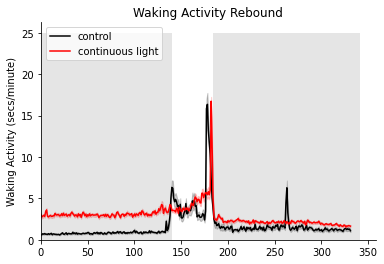

In [84]:
## control continuous, rebound data
## Waking activity

x = np.linspace(0,331,332)
y = df_wakeAct_con.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_wakeAct_ctrl.mean(axis=1)
#print(len(y_est_ctrl))
y_err_ctrl = df_wakeAct_ctrl.sem(axis=1)
#print(len(y_err_ctrl))


y_est_con=df_wakeAct_con.mean(axis=1)
#print(len(y_est_3am))
y_err_con = df_wakeAct_con.sem(axis=1)
#print(len(y_err_3am))


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')


#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((0,0),140, 25, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((184,0),157, 25, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

ax.set_title("Waking Activity Rebound")
ax.set_ylabel("Waking Activity (secs/minute)")
ax.set_ylim(0,)
ax.set_xlim(0,)
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Waking_activity_continuous_rebound.pdf")

len x 332
len y 332


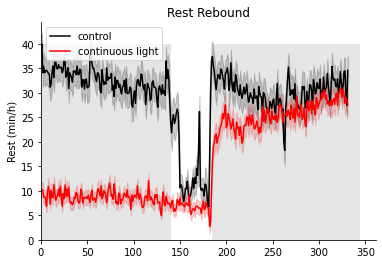

In [85]:
## control and continupus, rebound data
## Rest

x = np.linspace(0,331,332)
y = df_rest_con_NEW.mean(axis=1)
print("len x",len(x))
print("len y",len(y))



# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est_ctrl = df_rest_ctrl_NEW.mean(axis=1)
y_err_ctrl = df_rest_ctrl_NEW.sem(axis=1)

y_est_con=df_rest_con_NEW.mean(axis=1)
y_err_con = df_rest_con_NEW.sem(axis=1)


fig, ax = plt.subplots()
ax.plot(x, y_est_ctrl, '-', color='black',label="control")
ax.fill_between(x, y_est_ctrl - y_err_ctrl, y_est_ctrl + y_err_ctrl, alpha=0.2, color='black')
#ax.plot(x, y, 'o', color='tab:red')

ax.plot(x, y_est_con, '-', color='red',label="continuous light")
ax.fill_between(x, y_est_con - y_err_con, y_est_con + y_err_con, alpha=0.2, color='red')

#plot grey rectangles in background to indicate dark phases
rectangle = plt.Rectangle((0,0),140, 40, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)

rectangle = plt.Rectangle((184,0),160, 40, fc='grey', alpha=0.2)
plt.gca().add_patch(rectangle)
ax.set_title("Rest Rebound")
ax.set_ylabel("Rest (min/h)")
ax.set_ylim(0,)
ax.set_xlim(0,)
plt.legend(loc="upper left")
    
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_continuous_rebound.pdf")

# Bargraphs


Bargraphs of the rebound data comparing different phases of the day and night between groups.

### Continuous light

In [17]:
# load data and convert into dataframe
# control data
df_rest_night1_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_ctrl)
df_rest_testphase_ctrl = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_rest_testphase.csv", header=None)

control      0   1   2   3   4   5   6   7   8   9   ...  48  49  50  51  52  53  54  \
0     9  10  10   2   4   8   3   8   3   1  ...   5   1   9  10   8   9   9   
1     5   2   2   2   1   1   2   4   3   0  ...   9   3   7   9   5   8   4   
2     9   1   5   9   2   8   4   3   8   0  ...   9   1   6  10   4   9   5   
3     8   3   2   3   1   1   1   9   8   1  ...   9   1   5  10   1   9   4   
4     5   1   3   6   0   0   0  10   6   0  ...   9   1   3  10   4  10   3   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
134   2  10  10  10   4   8   1   8   5  10  ...  10   8   6   8   8   7   7   
135   2  10  10   3   5  10   0   9   4   6  ...   6   5   6  10   7   8   6   
136   1   9  10   1   2  10   1  10   6   2  ...   7   4   9   6   6   9   2   
137   1   8   9   5   3  10   0   9   9   1  ...  10   8   6   2   5   8   5   
138   4  10   9   4   3  10   0   8   2   1  ...   8  10   3   8   8   8   1   

     55  56  57  
0    10   9  

In [18]:
# continuous light
df_rest_night1_con =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\211201_LightSD_continuous_box8-20221226T144053Z-001\211201_LightSD_continuous_box8\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_con)
df_rest_testphase_con = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\211201_LightSD_continuous_box8-20221226T144053Z-001\211201_LightSD_continuous_box8\output_binned_rest_testphase.csv", header=None)


control      0   1   2   3   4   5   6   7   8   9   ...  86  87  88  89  90  91  92  \
0     0   3   1  10   3   9   2   4   2   2  ...  10   0   0   9  10  10   6   
1     2   3   2  10  10  10   1   0   1   1  ...  10   1   0   4   5  10  10   
2     2   4   5  10   9  10   2   3   3   0  ...   9   0   1   7   1  10   2   
3     8   3   2  10  10   8   0   0   1   0  ...   1   0   0   8   0  10   3   
4     3   2   1  10  10   6   2   6   1   0  ...   1   0   0   9   0  10   4   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
134   5   8  10  10   2  10   2   0   1   0  ...   7   8   4  10   4   8   1   
135   1   2  10  10   9   9   3   1   0   5  ...   3   6   9  10   4  10  10   
136   1   3   6  10   4   9   4   0   2   4  ...   2   1   9   4   9   9   9   
137   1   6   9  10   7   9   8   0   0   0  ...  10   0   3   0   5  10   8   
138   2   5  10  10   8  10   3   1   1   0  ...   4   2   1   5   0  10   7   

     93  94  95  
0     0   1  

In [19]:
# get the column average --> mean sleep value for each fish
# Average of each column using DataFrame.mean()
mean_df_rest_night1_ctrl = df_rest_night1_ctrl.mean(axis=0)
#print(mean_df_rest_night1_ctrl)
mean_df_rest_testphase_ctrl = df_rest_testphase_ctrl.mean(axis=0)

mean_df_rest_night1_con = df_rest_night1_con.mean(axis=0)
print(mean_df_rest_night1_con)
mean_df_rest_testphase_con = df_rest_testphase_con.mean(axis=0)


0      1.791367
1      3.446043
2      6.827338
3     10.000000
4      5.424460
        ...    
91     7.913669
92     4.683453
93     2.705036
94     3.323741
95     1.841727
Length: 96, dtype: float64


In [20]:
# Rest
## change unit from min/10min to min/h for rest
## multiply whole table by 6

mean_df_rest_night1_ctrl_NEW = mean_df_rest_night1_ctrl.mul(6)
#print(mean_df_rest_night1_ctrl_NEW)
mean_df_rest_testphase_ctrl_NEW = mean_df_rest_testphase_ctrl.mul(6)

mean_df_rest_night1_con_NEW =mean_df_rest_night1_con.mul(6)
mean_df_rest_testphase_con_NEW = mean_df_rest_testphase_con.mul(6)

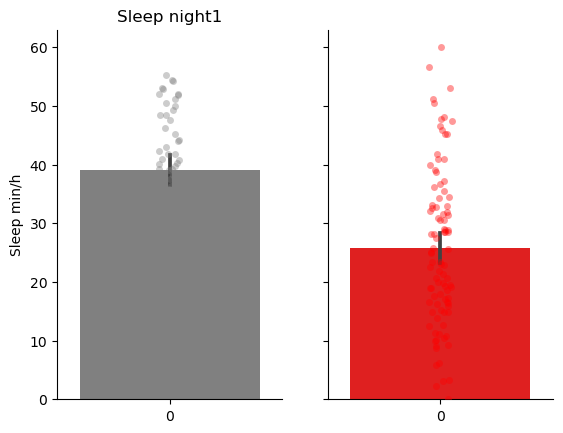

In [21]:
# plot

a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, color = "grey", orient="v")
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_rest_night1_con_NEW, color = "red", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_night1_con_NEW, dodge=True, color="red", alpha = 0.4,jitter = 0.05)

ax1.set_title("Sleep night1")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_continuous_mean_night1.pdf")

In [22]:
# independent t-test
p = ss.ttest_ind(mean_df_rest_night1_ctrl_NEW, mean_df_rest_night1_con_NEW, equal_var=False)
print(p)

TtestResult(statistic=7.048189980339345, pvalue=6.739166810890663e-11, df=145.461434864857)


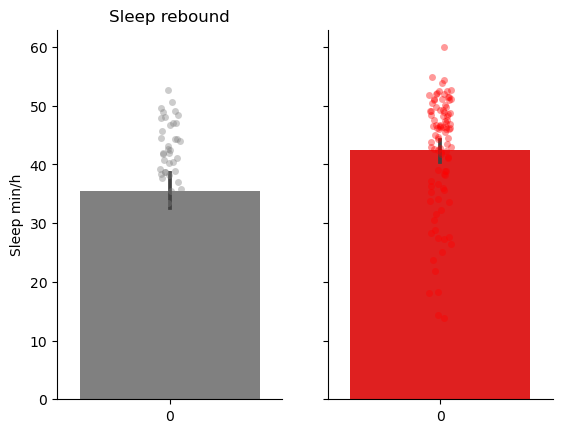

In [23]:
# plot

a4_dims = (11.7, 8.27)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax = sns.barplot(ax=ax1,data=mean_df_rest_testphase_ctrl_NEW, color = "grey", orient="v")
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_rest_testphase_ctrl_NEW, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2,data=mean_df_rest_testphase_con_NEW, color = "red", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_testphase_con_NEW, dodge=True, color="red", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep rebound")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_continuous_mean_rebound.pdf")

In [24]:
# independent t-test
p = ss.ttest_ind(mean_df_rest_testphase_ctrl_NEW, mean_df_rest_testphase_con_NEW, equal_var=False)
print(p)

TtestResult(statistic=-3.7884817960798487, pvalue=0.0002531108999601974, df=104.9279144784637)


## lightpulses

In [25]:
# load data and convert into dataframe
# control data
df_rest_night1_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_ctrl)
df_rest_testphase_ctrl = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_SDctrl_spontaneous_box9-20221226T144047Z-002\210504_SDctrl_spontaneous_box9\output_binned_rest_testphase.csv", header=None)

control      0   1   2   3   4   5   6   7   8   9   ...  48  49  50  51  52  53  54  \
0     9  10  10   2   4   8   3   8   3   1  ...   5   1   9  10   8   9   9   
1     5   2   2   2   1   1   2   4   3   0  ...   9   3   7   9   5   8   4   
2     9   1   5   9   2   8   4   3   8   0  ...   9   1   6  10   4   9   5   
3     8   3   2   3   1   1   1   9   8   1  ...   9   1   5  10   1   9   4   
4     5   1   3   6   0   0   0  10   6   0  ...   9   1   3  10   4  10   3   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
134   2  10  10  10   4   8   1   8   5  10  ...  10   8   6   8   8   7   7   
135   2  10  10   3   5  10   0   9   4   6  ...   6   5   6  10   7   8   6   
136   1   9  10   1   2  10   1  10   6   2  ...   7   4   9   6   6   9   2   
137   1   8   9   5   3  10   0   9   9   1  ...  10   8   6   2   5   8   5   
138   4  10   9   4   3  10   0   8   2   1  ...   8  10   3   8   8   8   1   

     55  56  57  
0    10   9  

In [26]:
# lightpulses
df_rest_night1_lp =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_LightSD_pulse_spontaneous_box8-20221226T144044Z-002\210504_LightSD_pulse_spontaneous_box8\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_lp)
df_rest_testphase_lp = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_LightSD_pulse_spontaneous_box8-20221226T144044Z-002\210504_LightSD_pulse_spontaneous_box8\output_binned_rest_testphase.csv", header=None)


control      0   1   2   3   4   5   6   7   8   9   ...  49  50  51  52  53  54  55  \
0     0   6   5   1   6   1   9   9   3   0  ...   2   0   1   0  10  10   2   
1    10   4   6   0   8   2   7   6   1   0  ...   0   0   0   0  10   8   2   
2    10   7   7   2   4   2   9   4   0   2  ...   1   0   2   0   7   1   0   
3    10   6   7   0   1   3   7   6   0   1  ...   1   0   1   0   2   8   3   
4     9   7   6   1   1   1   5   3   7   1  ...  10   0   2   0   4   6   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
134   4   8   9   1   1   0   9   0   1   0  ...   6   0   9   0   3   2   2   
135   8   4   3   5   1   3   9   0   0   0  ...   1   0   9   0   5   1   0   
136   8   7   3   4   2   1   5   1   1   0  ...   0   0  10   1  10   4   0   
137   8   4   0   2   0   1   7   4   1   0  ...   3   0   3   1   2   3   7   
138   7   0   1   2   1   3   6   1   0   0  ...   2   1   6   1   7   3   6   

     56  57  58  
0     0   0  

In [27]:
# get the column average --> mean sleep value for each fish
# Average of each column using DataFrame.mean()
mean_df_rest_night1_ctrl = df_rest_night1_ctrl.mean(axis=0)
#print(mean_df_rest_night1_ctrl)
mean_df_rest_testphase_ctrl = df_rest_testphase_ctrl.mean(axis=0)

mean_df_rest_night1_lp = df_rest_night1_lp.mean(axis=0)
#print(mean_df_rest_night1_lp)
mean_df_rest_testphase_lp = df_rest_testphase_lp.mean(axis=0)


In [28]:
# Rest
## change unit from min/10min to min/h for rest
## multiply whole table by 6

mean_df_rest_night1_ctrl_NEW = mean_df_rest_night1_ctrl.mul(6)
#print(mean_df_rest_night1_ctrl_NEW)
mean_df_rest_testphase_ctrl_NEW = mean_df_rest_testphase_ctrl.mul(6)

mean_df_rest_night1_lp_NEW =mean_df_rest_night1_lp.mul(6)
mean_df_rest_testphase_lp_NEW = mean_df_rest_testphase_lp.mul(6)

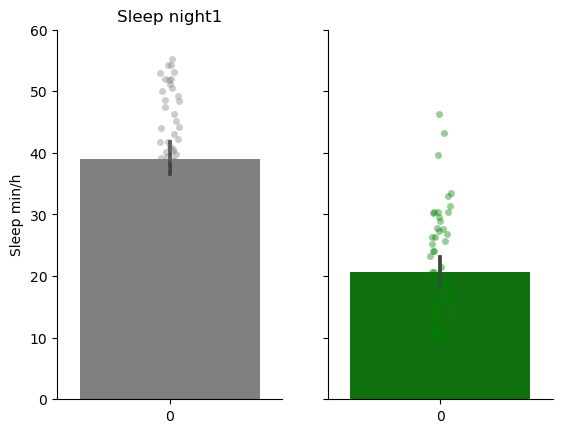

In [29]:
# plot

a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, color = "grey", orient="v")
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_rest_night1_lp_NEW, color = "green", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_night1_lp_NEW, dodge=True, color="green", alpha = 0.4,jitter = 0.05)

ax1.set_title("Sleep night1")
ax1.set_ylabel("Sleep min/h")
ax.set_ylim(0,60)
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_lightpulses_mean_night1.pdf")

In [30]:
# independent t-test
p = ss.ttest_ind(mean_df_rest_night1_ctrl_NEW, mean_df_rest_night1_lp_NEW, equal_var=False)
print(p)

TtestResult(statistic=10.55670333581099, pvalue=1.4554941926417606e-18, df=113.50065999053854)


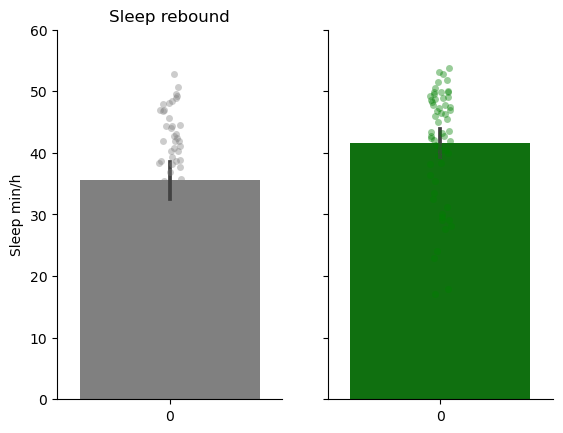

In [31]:
# plot

a4_dims = (11.7, 8.27)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax = sns.barplot(ax=ax1,data=mean_df_rest_testphase_ctrl_NEW, color = "grey", orient="v")
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_rest_testphase_ctrl_NEW, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2,data=mean_df_rest_testphase_lp_NEW, color = "green", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_testphase_lp_NEW, dodge=True, color="green", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep rebound")
ax1.set_ylabel("Sleep min/h")
ax.set_ylim(0,60)
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_lightpulses_mean_rebound.pdf")

In [32]:
# independent t-test
p = ss.ttest_ind(mean_df_rest_testphase_ctrl_NEW, mean_df_rest_testphase_lp_NEW, equal_var=False)
print(p)

TtestResult(statistic=-3.162043944969331, pvalue=0.0020331158502699858, df=108.19644456441736)


In [2]:
# load data and convert into dataframe
# control data
df_wake_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_wakeAct_day1.csv", header=None)
#print('control',df_wake_ctrl)
df_wake_lp = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210504_LightSD_pulse_spontaneous_box8-20221226T144044Z-002\210504_LightSD_pulse_spontaneous_box8\output_binned_wakeAct_day1.csv", header=None)
#print('lp',df_wake_lp)

In [3]:
# get the column average --> mean waking activity value for each fish
# Average of each column using DataFrame.mean()
mean_df_wake_ctrl = df_wake_ctrl.mean(axis=0)
#print(mean_df_wake_ctrl)
mean_df_wake_lp = df_wake_lp.mean(axis=0)
#print(mean_df_wake_lp)

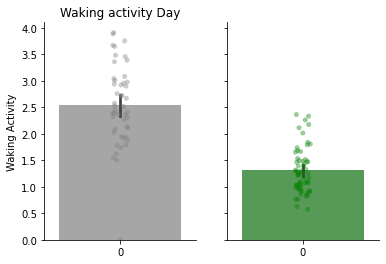

In [6]:
# plot

a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_wake_ctrl, color = "grey", orient="v", alpha =0.7)
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_wake_ctrl, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_wake_lp, color = "green", orient="v",alpha =0.7)
ax = sns.stripplot(ax=ax2,data=mean_df_wake_lp, dodge=True, color="green", alpha = 0.4,jitter = 0.05)

ax1.set_title("Waking activity Day")
ax1.set_ylabel("Waking Activity")
#ax.set_ylim(0,60)
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_lightpulses_mean_night1.pdf")

In [7]:
# independent t-test
p = ss.ttest_ind(mean_df_wake_ctrl, mean_df_wake_lp, equal_var=False)
print(p)

TtestResult(statistic=10.152112816571904, pvalue=1.7741718432861974e-15, df=71.14672392743184)


## 6h light

In [33]:
# load data and convert into dataframe
# control data
df_rest_night1_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_ctrl)
df_rest_testphase_ctrl = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_rest_testphase.csv", header=None)

control      0   1   2   3   4   5   6   7   8   9   ...  38  39  40  41  42  43  44  \
0     9  10  10   5  10   8   9   8   8  10  ...   9  10   8   3   8  10   9   
1    10   9   7   3  10   6   9  10   9   8  ...  10   9  10   7   7  10   8   
2    10  10  10  10  10   6   6  10   6   8  ...   9   2  10   4   8   6   9   
3    10  10  10  10  10  10   4  10   8  10  ...   7   1  10   4   9  10  10   
4    10  10  10  10  10   7   2  10   9   9  ...   7   6   9   0  10   9  10   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
134   4   2   8   4   7   7   9   8   7   2  ...  10   5   8   4   8   8   1   
135   4   4   4   8   4   3   4   7   9   5  ...  10   2   9   3   6   8   0   
136   7   5   8   2   7   6   8   8   2   5  ...   9   5   9   0   6   6   0   
137   6   1   8   5  10   6   6   9   0   3  ...   4   1  10   1   2   6   4   
138   5   6   1   6  10   2   9  10   5   5  ...  10   2   7   3   6   7   2   

     45  46  47  
0    10  10  

In [34]:
# 6h light
df_rest_night1_6h =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_3am_box10-20221226T144029Z-001\210422_LightSD_3am_box10\output_binned_rest_night1.csv", header=None)
print('control',df_rest_night1_lp)
df_rest_testphase_6h = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_3am_box10-20221226T144029Z-001\210422_LightSD_3am_box10\output_binned_rest_testphase.csv", header=None)


control      0   1   2   3   4   5   6   7   8   9   ...  49  50  51  52  53  54  55  \
0     0   6   5   1   6   1   9   9   3   0  ...   2   0   1   0  10  10   2   
1    10   4   6   0   8   2   7   6   1   0  ...   0   0   0   0  10   8   2   
2    10   7   7   2   4   2   9   4   0   2  ...   1   0   2   0   7   1   0   
3    10   6   7   0   1   3   7   6   0   1  ...   1   0   1   0   2   8   3   
4     9   7   6   1   1   1   5   3   7   1  ...  10   0   2   0   4   6   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
134   4   8   9   1   1   0   9   0   1   0  ...   6   0   9   0   3   2   2   
135   8   4   3   5   1   3   9   0   0   0  ...   1   0   9   0   5   1   0   
136   8   7   3   4   2   1   5   1   1   0  ...   0   0  10   1  10   4   0   
137   8   4   0   2   0   1   7   4   1   0  ...   3   0   3   1   2   3   7   
138   7   0   1   2   1   3   6   1   0   0  ...   2   1   6   1   7   3   6   

     56  57  58  
0     0   0  

In [35]:
# get the column average --> mean sleep value for each fish
# Average of each column using DataFrame.mean()
mean_df_rest_night1_ctrl = df_rest_night1_ctrl.mean(axis=0)
#print(mean_df_rest_night1_ctrl)
mean_df_rest_testphase_ctrl = df_rest_testphase_ctrl.mean(axis=0)

mean_df_rest_night1_6h = df_rest_night1_6h.mean(axis=0)
#print(mean_df_rest_night1_lp)
mean_df_rest_testphase_6h = df_rest_testphase_6h.mean(axis=0)


In [36]:
# Rest
## change unit from min/10min to min/h for rest
## multiply whole table by 6

mean_df_rest_night1_ctrl_NEW = mean_df_rest_night1_ctrl.mul(6)
#print(mean_df_rest_night1_ctrl_NEW)
mean_df_rest_testphase_ctrl_NEW = mean_df_rest_testphase_ctrl.mul(6)

mean_df_rest_night1_6h_NEW =mean_df_rest_night1_6h.mul(6)
mean_df_rest_testphase_6h_NEW = mean_df_rest_testphase_6h.mul(6)
print(mean_df_rest_testphase_6h_NEW)

0     15.652174
1     15.763975
2     13.006211
3     35.813665
4     31.490683
5     29.478261
6     32.795031
7     28.583851
8     37.751553
9     25.341615
10    36.335404
11    37.192547
12    23.515528
13    18.298137
14    19.304348
15    17.850932
16    32.795031
17    40.248447
18    36.708075
19    30.335404
20    39.465839
21    14.832298
22    26.757764
23    23.105590
24    43.118012
25    18.782609
26    13.714286
27    13.267081
28    26.757764
29    47.552795
30    16.397516
31    41.031056
32    15.093168
33    10.732919
34    50.496894
35    25.043478
36    18.596273
37    27.093168
38    16.881988
39    27.652174
40    39.055901
41    27.018634
42     8.832298
43    38.683230
44    20.720497
45    16.695652
46    19.937888
47    25.006211
dtype: float64


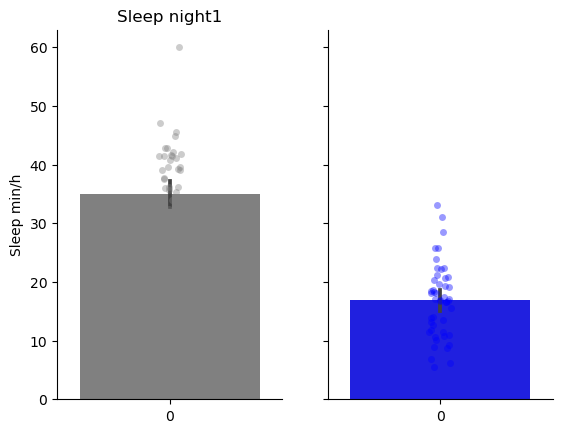

In [37]:
# plot

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, color = "grey", orient="v")
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_rest_night1_ctrl_NEW, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_rest_night1_6h_NEW, color = "blue", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_night1_6h_NEW, dodge=True, color="blue", alpha = 0.4,jitter = 0.05)

ax1.set_title("Sleep night1")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_6h_mean_night1.pdf")

In [38]:
# independent t-test
p = ss.ttest_ind(mean_df_rest_night1_ctrl_NEW, mean_df_rest_night1_6h_NEW, equal_var=False)
print(p)

TtestResult(statistic=12.130503665270433, pvalue=1.902211262831178e-20, df=87.57482217198118)


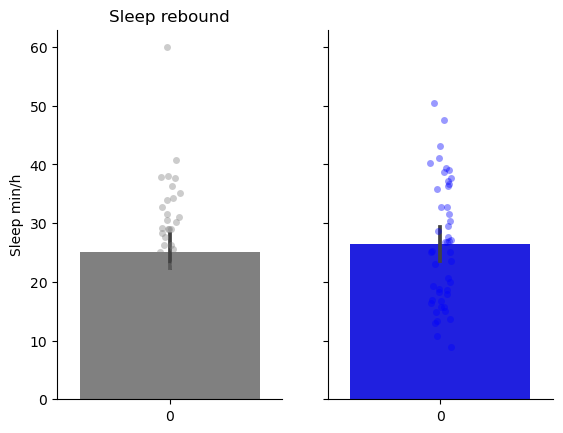

In [39]:
# plot

a4_dims = (11.7, 8.27)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax = sns.barplot(ax=ax1,data=mean_df_rest_testphase_ctrl_NEW, color = "grey", orient="v")
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_rest_testphase_ctrl_NEW,  color="grey", alpha = 0.4, jitter = 0.05)


ax = sns.barplot(ax=ax2,data=mean_df_rest_testphase_6h_NEW, color = "blue", orient="v")
ax = sns.stripplot(ax=ax2,data=mean_df_rest_testphase_6h_NEW, color="blue", alpha = 0.4,jitter = 0.05)


ax1.set_title("Sleep rebound")
ax1.set_ylabel("Sleep min/h")
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_6h_mean_rebound.pdf")

In [40]:
# independent t-test
p = ss.ttest_ind(mean_df_rest_testphase_ctrl_NEW, mean_df_rest_testphase_6h_NEW, equal_var=False)
print(p)

TtestResult(statistic=-0.6666713230953152, pvalue=0.5066199803634126, df=93.72330323498514)


In [10]:
# load data and convert into dataframe
# control data
df_wake_ctrl =pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_ctrl_box9-20221226T144041Z-001\210422_LightSD_ctrl_box9\output_binned_wakeAct_day1.csv", header=None)
#print('control',df_wake_ctrl)
df_wake_6h = pd.read_csv(r"E:\Sleep_deprivation_boxes\Will_data\Will_rebound_data\210422_LightSD_3am_box10-20221226T144029Z-001\210422_LightSD_3am_box10\output_binned_wakeAct_day1.csv", header=None)
#print('lp',df_wake_6h)

control           0        1         2       3         4        5       6        7   \
0    2.83000  4.68000   6.06000   2.630   4.08000   3.6600   4.450   4.9500   
1    2.10000  1.79000   3.12000   2.200   2.36670   4.0700   2.510   3.0800   
2    5.25000  2.61000   2.23750   3.830   4.09000   7.2200   4.910   5.3222   
3    6.55000  4.84000   3.52220   6.600   8.17000  15.1000  10.622   9.9200   
4    8.49000  9.17000  10.93000  12.470  10.70000  18.6500  16.180  10.1200   
..       ...      ...       ...     ...       ...      ...     ...      ...   
200  1.13330  0.90000   0.70000   1.625   1.66670   1.7750   1.660   2.2000   
201  0.88571  0.92000   0.36667   0.800   0.00000   1.2222   1.550   1.9429   
202  1.09000  0.83333   2.60000   1.320   0.53333   1.8333   1.900   1.9667   
203  0.93750  0.75000   1.80000   1.400   0.60000   1.6400   2.760   1.2200   
204  0.68333  1.08000   1.15000   1.020   1.30000   1.4889   1.920   1.4250   

         8       9   ...      38       39  

In [12]:
# get the column average --> mean waking activity value for each fish
# Average of each column using DataFrame.mean()
mean_df_wake_ctrl = df_wake_ctrl.mean(axis=0)
#print(mean_df_wake_ctrl)
mean_df_wake_6h = df_wake_6h.mean(axis=0)
#print(mean_df_wake_lp)

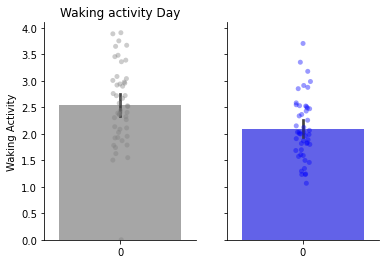

In [13]:
# plot

a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=a4_dims)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax = sns.barplot(ax=ax1,data=mean_df_wake_ctrl, color = "grey", orient="v", alpha =0.7)
# Add jitter with the swarmplot function.
ax = sns.stripplot(ax=ax1,data=mean_df_wake_ctrl, dodge=True, color="grey", alpha = 0.4,jitter = 0.05)

ax = sns.barplot(ax=ax2, data=mean_df_wake_6h, color = "blue", orient="v",alpha =0.7)
ax = sns.stripplot(ax=ax2,data=mean_df_wake_6h, dodge=True, color="blue", alpha = 0.4,jitter = 0.05)

ax1.set_title("Waking activity Day")
ax1.set_ylabel("Waking Activity")
#ax.set_ylim(0,60)
sns.despine(right=True, bottom=False)
#fig.savefig("C:/Users/paula/Documents/MATLAB/Engert_lab/Will_rebound_data/Rebound_analysis/Rest_lightpulses_mean_night1.pdf")

In [14]:
# independent t-test
p = ss.ttest_ind(mean_df_wake_ctrl, mean_df_wake_6h, equal_var=False)
print(p)

TtestResult(statistic=3.242521441276924, pvalue=0.00166723980537035, df=89.19268613067334)
